<a href="https://colab.research.google.com/github/climatechange-ai-tutorials/optimal-power-flow/blob/main/AI_for_Optimal_Power_Flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# MIT License
#
#@title Copyright (c) 2024 CCAI Community Authors { display-mode: "form" }
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# AI for Optimal Power Flow
Author(s):
* Version released in 2023
  * Jorge Montalvo, CCAI, jorge@climatechange.ai
  * Utkarsha Agwan, uagwan@berkeley.edu
  * Panos Moutis, panay1ot1s@climatechange.ai
* Version revised and released in 2024
  * Enming Liang, enming.cityu@gmail.com
  * Advising comments form Priya L. Donti (MIT) and Minghua Chen (CityU, HK).

This tutorial provides a beginner-friendly introduction to AI for optimal power flow (a fundamental optimization problem in power grids) using a simple neural network based on PyTorch (a popular deep learning framework).
By the end of this tutorial, you will have a basic understanding of how to model and solve optimal power flow problems using neural networks.

# Table of Contents

*   [Overview](#overview)
*   [Climate Impact](#climate-impact)
<!-- *   [Target Audience](#target-audience) -->
*   [Background & Prerequisites](#background-and-prereqs)
*   [Software Requirements](#software-requirements)
*   [Fundamental of Power Grids](#fundamental-power-grid)
*   [AC Optimal Power Flow](#ac-opf)
*   [Machien Learning for ACOPF](#ml-ac-opf)
*   [Results & Discussion](#results-and-discussion)
*   [References](#references)


<a name="overview"></a>
# Overview

Welcome to this tutorial on AI for AC Optimal Power Flow (OPF).

AC-OPF is a fundamental problem in power system optimization, aimed at determining the optimal settings for generators and various control variables. The goal is to minimize operating costs while adhering to a range of operational constraints.

In the rapidly evolving energy sector, the ability to quickly and efficiently solve the AC-OPF problem is becoming increasingly important. Faster and more scalable solutions enable real-time operational decisions and facilitate the integration of intermittent renewable energy sources like wind and solar power. Traditional methods, such as nonlinear programming, often struggle with the scale and complexity of modern power grids, leading to slower response times and potential inefficiencies.

Recent advancements in artificial intelligence, particularly deep learning, have introduced neural networks as a powerful alternative to traditional optimization methods. Neural networks can approximate complex, nonlinear functions, making them well-suited for modeling the intricacies of AC-OPF problems. By leveraging PyTorch, a leading deep learning framework, we can train neural networks to provide fast, scalable solutions for AC-OPF. This approach not only speeds up the computation but also enhances the ability to handle larger and more complex power grid systems.

By the end of this tutorial, you will:
- Understand the fundamental concepts and challenges of the AC-OPF problem.
- Gain hands-on experience in implementing a neural network for AC-OPF using PyTorch.
- Develop the foundational skills necessary to approach more complex power system optimization problems and delve deeper into research in this area.

This tutorial is designed to give you both the theoretical foundation and practical skills needed to explore AI applications in power system optimization.

Let’s embark on this journey to discover how neural network-based solutions can revolutionize AC Optimal Power Flow.




<!-- Traditionally, AC OPF has been solved using mathematical optimization techniques like nonlinear programming, but with the advancements in deep learning, neural networks have emerged as an alternative approach to address this complex problem. In this tutorial, we will focus on a simplified version of the AC OPF problem and demonstrate how to leverage the power of PyTorch to train a neural network to approximate the optimal solutions. Our goal is to develop an understanding of the basic concepts and techniques involved in AC OPF using a neural network framework. -->

<!-- By the end of this tutorial, you will have gained practical experience in implementing a simple neural network for AC OPF using PyTorch. This knowledge can serve as a foundation for tackling more advanced power system optimization problems and exploring further research opportunities in this domain. -->

<!-- Let's begin our journey into the exciting world of AC Optimal Power Flow using AI with PyTorch! -->




<a name="climate-impact"></a>
# Climate Impact

The methods and tools introduced in this tutorial can significantly contribute to mitigating climate change through various pathways:

* **Renewable Energy Integration:** Solving AC Optimal Power Flow quickly and in real time is crucial for efficiently integrating and managing renewable energy sources such as wind and solar power. By optimizing the operation of power systems with a neural network-based AC-OPF approach, we can better accommodate renewable energy generation, reducing reliance on fossil fuel-based generation and lowering greenhouse gas emissions.

* **Enhancing Energy Efficiency:** AC-OPF helps optimize the dispatch of power generation units, enabling more efficient utilization of available resources. By minimizing system losses and improving overall energy efficiency, the neural network-based AC-OPF model can contribute to reducing carbon emissions associated with power generation.

* **Grid Resilience and Stability:** AC-OPF plays a significant role in maintaining grid resilience and stability. By accurately modeling and optimizing the power flow, the neural network-based AC-OPF model can enhance grid stability, reduce the risk of blackouts, and otherwise improve the operation of the power grid.

<!-- <a name="target-audience"></a>
# Target Audience


 The target audience for this tutorial is people who are interested in working at the intersection of power systems and machine learning, and are interested in learning about potential problems to work on. This tutorial introduces a particular problem in power system optimization which is well suited for ML solutions. -->


<a name="background-and-prereqs"></a>
# Background & Prerequisites





## Target Audience
 The target audience for this tutorial is people who are interested in working at the intersection of power systems and machine learning, and are interested in learning about potential problems to work on. This tutorial introduces a particular problem in power system optimization which is well suited for AI/machine learning solutions.


## Prerequisites

The tutorial assumes a basic understanding of optimization principles, familiarity with basic electrical quantities (power, current, and voltage), and familiarity with complex numbers. Familiarity with PyTorch and neural networks will also be helpful, but are not strictly required, as we will provide explanations and code snippets to guide you through the implementation process.


<a name="software-requirements"></a>
# Software Requirements
The Python version at the time of this submission in Colab = Python 3.10.12

The following libraries are required:
*   pandas
*   numpy
*   matplotlib
*   pypower
*   pytorch

In [1]:
!python --version

Python 3.10.12


In [2]:
!pip install pypower --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.0/347.0 kB 15.2 MB/s eta 0:00:00


In [3]:
# Data visualization
import matplotlib.pyplot as plt

# Data manipulation
import pandas as pd
import numpy as np

# Deep learning framework
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset

# For reproducibility
SEED = 2024
torch.manual_seed(SEED)

<a name="fundamental-power-grid"></a>
# Fundamentals of Power Grids

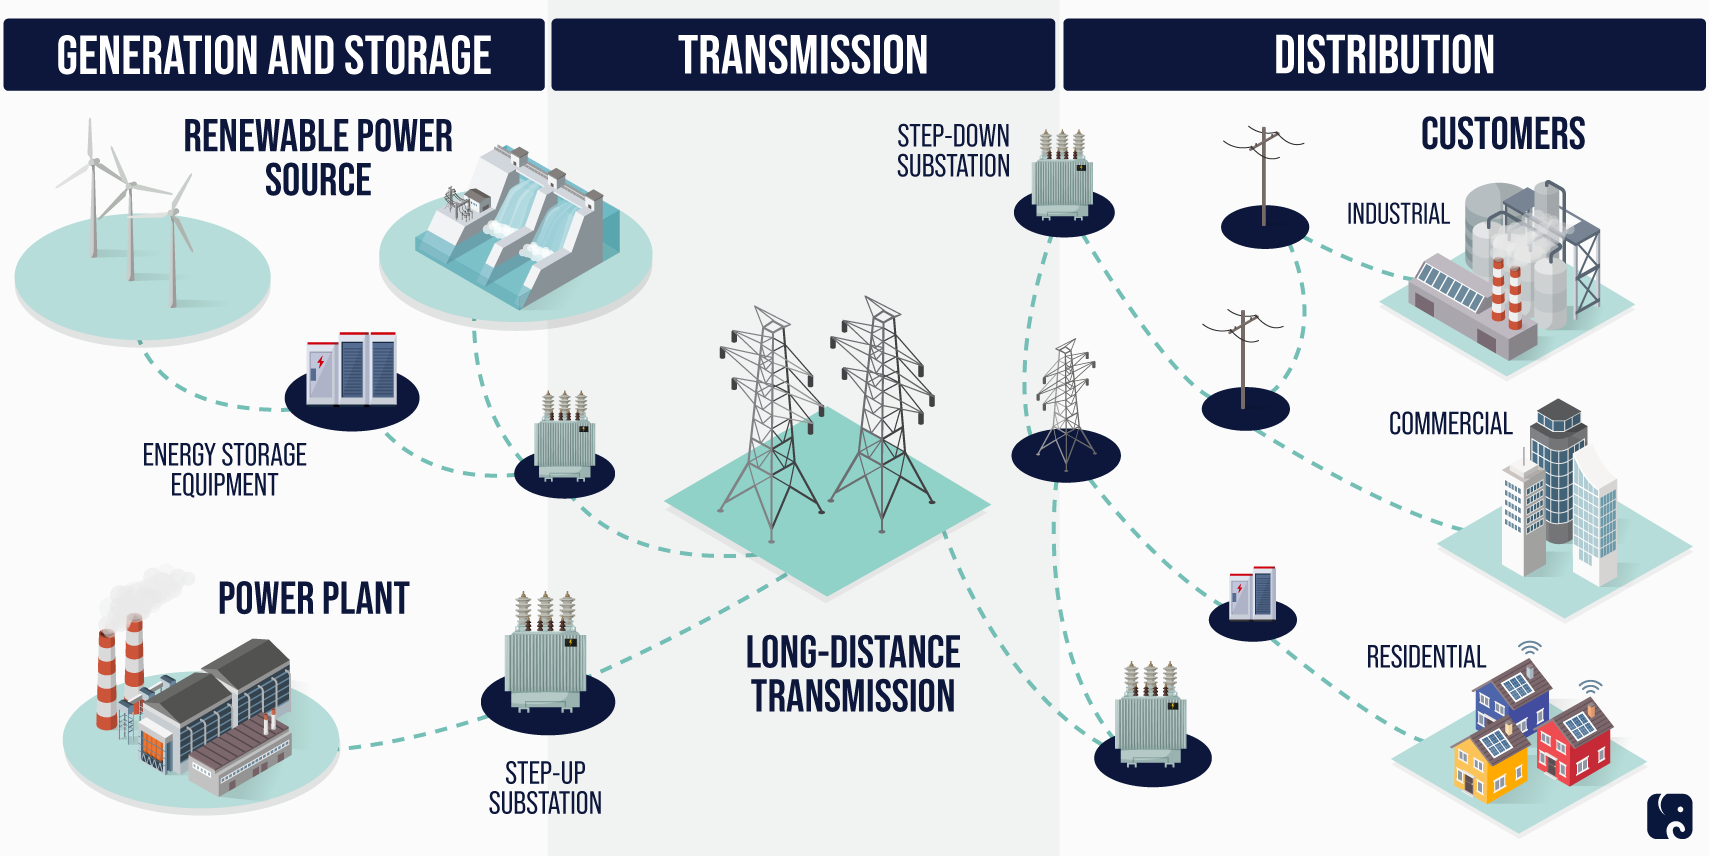

Figure source: [Senate RPC](https://www.rpc.senate.gov/policy-papers/infrastructure-cybersecurity-the-us-electric-grid)

***Electrical power systems*** (or grids or networks) are extensive infrastructures designed to facilitate the generation, transmission, and utilization of electricity. These systems cater to a wide array of customers, including residential, industrial, and commercial entities. Key components of electrical power systems include:

* **Electrical Generators**: Located in power plants, these devices convert various forms of energy (such as chemical, nuclear, or renewable) into electrical energy.
* **Transmission Lines**: Comprising overhead lines and underground or submarine cables, these are mounted on towers or laid below ground to transport electricity over long distances.
* **Transformers and Substations**: Essential for modifying electrical voltage to suitable levels, transformers ensure efficient power transmission over long distances and facilitate effective distribution within localized areas.
* **Load/Demand**: These are the end-users of electricity, which include household appliances, industrial machinery such as furnaces and motors, and commercial facilities that use electricity for processes and lighting.



## The Role of Alternating Current

Alternating current (AC) is the standard form of electricity supplied to homes and businesses. Unlike direct current (DC), where the electric charge flows in a single direction, AC periodically reverses direction. This behavior is typically represented as a sinusoidal wave, where the current and voltage oscillate back and forth. This section explains the background of AC, its advantages, and why it is predominantly used in power systems.

The choice of AC over DC for mainstream power distribution was largely settled by the "War of Currents" in the late 19th century, where Thomas Edison and Nikola Tesla were prominent figures. Tesla, backed by George Westinghouse, advocated for AC due to its ability to easily transform to different voltages using transformers.

**Why Use AC?**
- **Efficient Long-Distance Transmission**: AC is favored for transmitting power over long distances due to its ability to be easily transformed between different voltage levels.
- **Simplicity and Cost-effectiveness**: The equipment needed to generate, transform, and use AC is simpler and less expensive than that required for comparable DC systems.

**Fundamental Concepts:**
- **Active and Reactive Power:**
  - Active Power: This is the "real" power that actually performs work, like lighting a bulb or heating an oven.
  - Reactive Power: This power does not perform work but is necessary to maintain the voltage levels required for stable power supply and efficient system performance.
- **Voltage and Current Waveforms:** The magnitude and phase angle of these waveforms are essential for everything from the design of electrical circuits to the real-time management of power systems.

## Modeling Power Grid

To effectively approach the problem of AC Optimal Power Flow (OPF), it is essential to have a foundational understanding of the structure and functioning of the power grid. The power grid is structured as a network of **nodes** (commonly referred to as buses) interconnected by transmission **lines** (also known as branches).

Here’s a breakdown of these components:

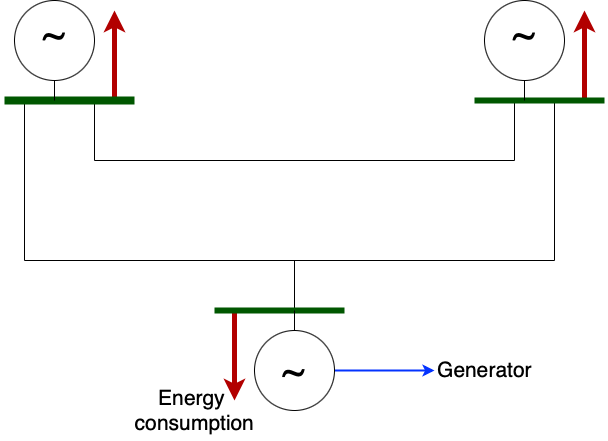

### Nodes/Buses

In this diagram, each green line represents a node in the power network. Each node has a generator (the circle with a tilde in the middle) and a consumer (red arrow) connected to it. The consumer draws power from the node, while the generator injects power into the network from the node. The net power injection at each node is the difference between the generator output and consumer load.

Each node in a power grid is described by the following variables:
- Complex Power: $S=P+{\rm j}Q$
  - Active Power (P): Measured in watts (W), this is the power that actually performs work. It is the real component of the complex power. Active power is critical for determining how much energy is being converted into work and heat at a particular node.
  - Reactive Power (Q): Measured in volt-amperes reactive (VAR), this represents the power stored in the field of the electrical system. Unlike active power, it does not perform work but is crucial for maintaining the voltage levels necessary to transport active power through the network efficiently.
- Complex Voltage: $V=V_m e^{{\rm j \theta}}$
  - Voltage Magnitude ($V_m$): Expressed in volts (V), this is the measure of the electrical potential at the node. It is crucial for system stability and efficient power transfer. High voltage levels allow power to be transmitted over long distances with less loss.
  - Voltage Angle (θ): Measured in degrees or radians, this angle indicates the phase of the voltage relative to a reference point. It is crucial for synchronizing the phase of the voltage across the network, which affects how power flows from one node to another.


<!-- The power injection at each node can be modeled as:

1. $\underline{I}_n$: the current injected at the n-th node
2. $\underline{V}_n$: the voltage at the n-th node
3. $\underline{S}_n$: the total power injection at the n-th node

As discussed previously, both the voltage and current are phasors whose phases vary with time. We can represent them using complex numbers, with
1. $\underline{I}_n = I_n \cos(\theta) + \text{j} I_n \sin(\theta)$
2. $\underline{V}_n = V_n \cos(\theta) + \text{j} V_n \sin(\theta)$

The relationship between the power, current and voltage is given by

$\underline{S}_n = \underline{V}_n \underline{I}_n^* = P_n + \text{j} Q_n$,

where $P_n$ is the active power injection and $Q_n$ is the reactive power injection at node $n$. -->


### Lines/Branches

Transmission lines carry electrical energy from power generation units to distribution centers or directly to consumers. They play a pivotal role in ensuring that electricity generated at power stations reaches end-users across various geographic regions.

Transmission lines are characterized by its addimitance $Y= G+{\rm j}B$, where:

- Conductance $G$: Measures the ability of the line to conduct electric current. It represents the real part of the admittance and indicates the power dissipation in the line due to resistance. Higher conductance implies lower energy losses.
- Susceptance $B$: Represents the imaginary part of admittance and is crucial for understanding the capacitive or inductive nature of the line. Susceptance affects the reactive power flow and voltage regulation across the line.


The current flow ($I$) or power flow ($S$) through each transmission line in the power network is determined by both the line admittance and the voltage at the nodes connecting the line.

<!-- Consider two nodes:  𝑖  and  𝑗 , and say line  𝑙  connects them. Then
$$({V}_{i} - {V}_{j})  {Y}_{ij} = {I}_{ij}$$ -->


<!-- We can usually model lines as a combination of resistive and inductive impedances, represented by $R_l, X_l$ respectively. This paradigm is an approximation for short lines, and the total impedance of the line is given by

$\underline{Z}_l = R_l + \text{j} X_l$

A more commonly used notion is that of 'admittance' which is simply the reciprocal of the impedance

$\underline{Y}_l = \frac{1}{\underline{Z}_l}$ -->


<!-- The voltage difference across a line is the difference in node voltages at the endpoints, and we denote this difference by $\underline{V}_l$. We denote the current through a line by $\underline{I}_l$. -->

### Power balance

In electrical engineering, understanding the distribution and balance of electric power across a network is crucial. This understanding is primarily derived from two fundamental principles: Kirchhoff's Current Law (KCL) and Kirchhoff's Voltage Law (KVL). These laws are essential for analyzing circuits, ensuring that all power and energy flows are accurately accounted for.

**Kirchhoff's Current Law (KCL)**
KCL states that the algebraic sum of currents entering and exiting a node must equal zero. This principle ensures that there is no net accumulation of charge at any node: every charge that enters a node must also leave. For each node $i$, we have:
$$ {I}_i = \sum\limits_{j \in {N}_i} {I}_{ij} $$
where ${N}_i$ denotes all nodes connected to node $i$, and $I_{ij}$ is the current from node $i$ to node $j$.

**Kirchhoff's Voltage Law (KVL)**
KVL states that the sum of voltage differences around any closed loop in a circuit must be zero. This means that the total increase and decrease in voltage around any loop will cancel out, ensuring you return to the same voltage level from which you started. Consider two nodes: $i$ and $j$, and say line $l=(i,j)$ connects them. Then

$$({V}_{i} - {V}_{j})  {Y}_{ij} = {I}_{ij}$$

where ${I}_{ij}$ is the current flowing along a line connected to node $i$, and is positive when current is flowing away from the node.

**Power Balance Equation**

By combining KCL and KVL, we can derive the power balance equation for each node in the power system.


First, the complex power injection is jointly determined by voltage and current injection at node:
$$
S_i = V_i  I_i^*
$$
Using the expression for $ I_i $ from KCL, this becomes:
$$
S_i = V_i  \left(\sum_{j \in N_i} I_{ij}\right)^*
$$
Substitute $I_{ij}$ from KVL, this becomes:
$$
S_i = V_i \left(\sum_{j \in N_i} (V_i - V_j) Y_{ij}\right)^*
$$
Further, the complex power also equals to the difference between generation and demand as:
$$ S_i = (P_{G,i}-P_{D,i}) + {\rm j} (Q_{G,i}-Q_{D,i})$$



Therefore, we derive the power balance equation:
$$
(P_{G,i} - P_{D,i}) + {\rm j}(Q_{G,i} - Q_{D,i}) = V_i \left(\sum_{j \in N_i} (V_i - V_j) Y_{ij}\right)^*
$$
This equation shows that the net power at any node is a balance between generated power, consumed power, and the complex power flow between nodes. This is critical for planning, operation, and optimization of power systems to ensure stable and efficient electricity distribution.

## Operating the Power Grid

The operation of power grids involves managing a complex network of generators, transformers, transmission lines, and distribution systems. These systems work together to ensure the reliable and efficient distribution of electricity from power plants to consumers. Here is an introduction to some of the critical operational objectives of power grids:
- **Generation cost**: The generation cost refers to the expenses involved in producing electricity. This includes the cost of fuel (coal, natural gas, nuclear material, etc.), operation and maintenance of power plants, and environmental compliance costs.
- **Power balance**: Power balance, as we introduced above, is crucial in the operation of power grids. It refers to the need to constantly balance electricity supply with the demand. If this balance is disrupted, it can lead to power outages or excessive strain on the grid, potentially causing equipment damage or failures.
- **Physical limits**: The physical limits of a power grid encompass the technical constraints of the network, such as the capacity of transmission lines, transformers, and substations. These components can only handle certain amounts of electrical load before becoming inefficient or risking damage.

In the following tutorial, we will introduce AC Optimal Power Flow, a fundamental mathematical model used to optimize the operation of power networks. It is solved to ensure efficient, safe, and economical power system operations.



<a name="ac-opf"></a>
# AC Optimal Power Flow

The AC-OPF problem is a complex nonlinear optimization problem that aims to find the optimal operating point of the power system, considering the various physical and operational constraints. Solving this problem is crucial for power system operators to ensure reliable, efficient, and secure operation of the power grid.




## AC-OPF formulation
The formulation presented here provides a comprehensive mathematical representation of the ACOPF problem:

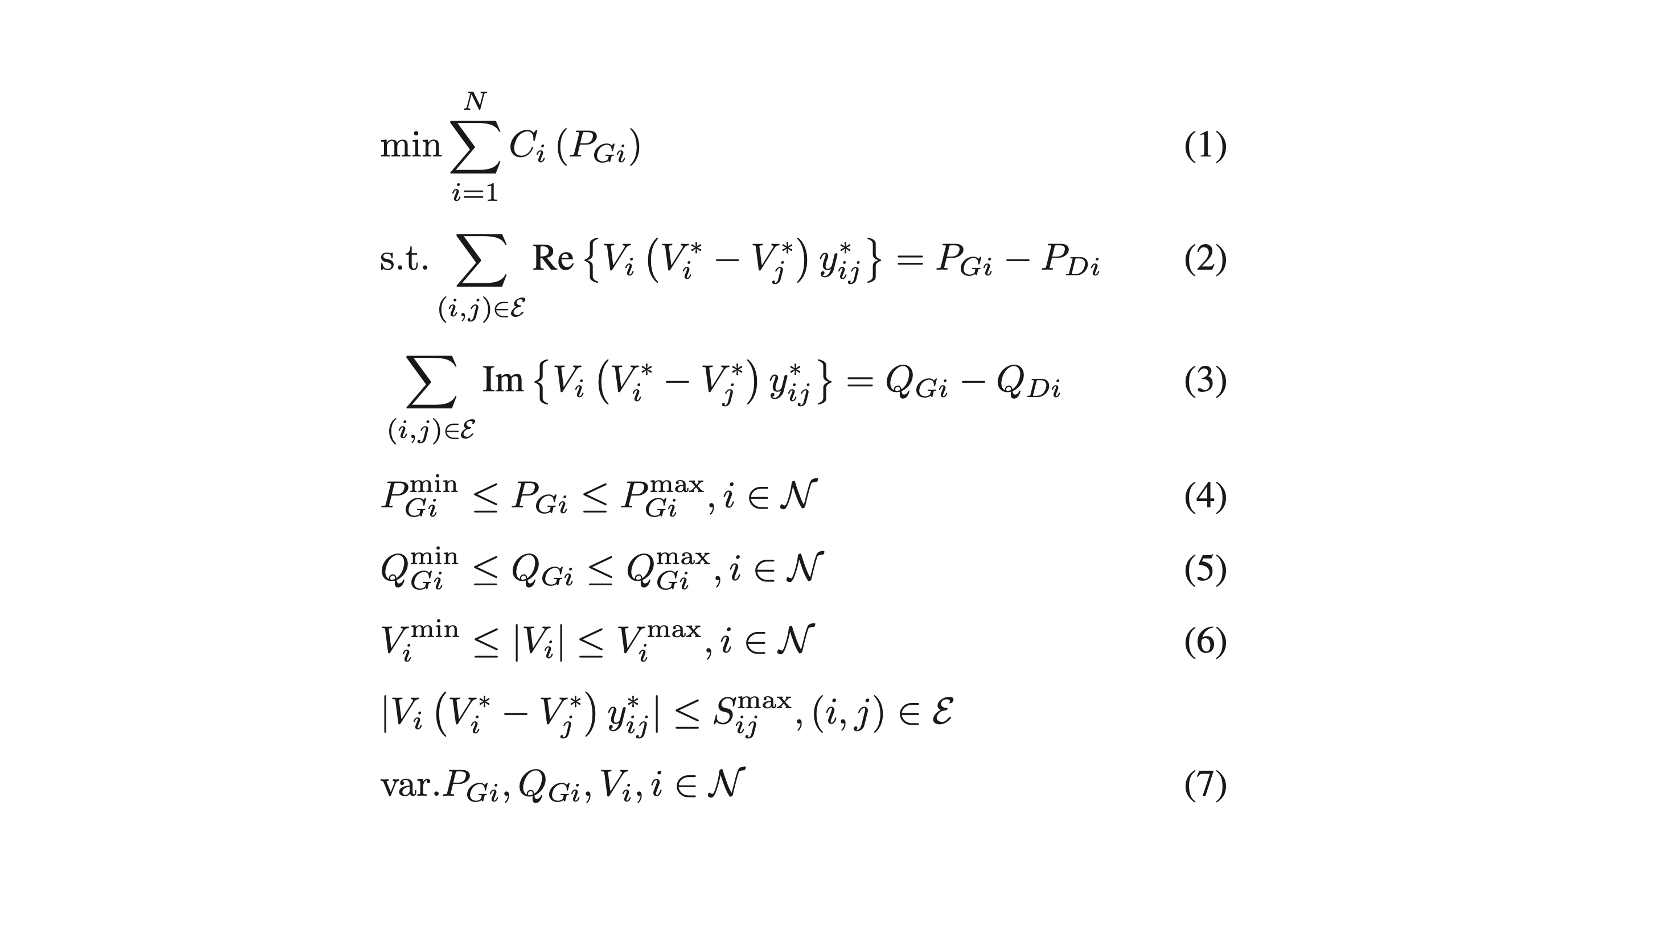

- **Objective function** (Equation 1):
The objective is to minimize the sum of the costs associated with the real power generation at each bus.
- **Power flow constraints** (Equations 2 and 3):
These constraints ensure that the real and reactive power balance is maintained at each bus, accounting for the complex power flows in the network.
- **Variable bounds** (Equations 4-6):
These constraints impose limits on the real and reactive power generation, as well as the voltage magnitudes at each bus, to ensure the feasibility of the solution.
- **Apparent power flow limit** (Equation 6):
This constraint limits the <i>apparent power</i> flow (i.e., magnitude of the complex power flow) through each transmission line or transformer to a maximum value, ensuring that the system operates within its physical limits.
- **Optimization variables** (Equation 7):
The optimization variables in this formulation are the real and reactive power generation, and the complex voltage (magnitude and angle).

In summary, solving the AC-OPF problem is essential for the efficient and reliable operation of power networks. It helps in optimizing power generation and distribution, ensuring economic operation, complying with physical and operational constraints, and enhancing the overall security and flexibility of the grid.

However, AC-OPF is non-linear and non-convex, which means solving it can be computationally expensive. Conventional approaches leverage various iterative optimization techniques to find a solution for AC-OPF.

<!-- for a network with $N$ nodes, the system operator would have to solve $2N$ non-linear equations at each time step.  -->




##  Conventional methods for AC-OPF

The solution of the AC-OPF provides a setpoint for power generators in order to satisfy a specific state of electricity consumption. Given its complexity, various methods have been developed to solve the AC-OPF problem. Here, we describe some conventional methods, including DC approximation, convex relaxation, and interior point methods:
- **DC approximation**: This approximation simplifies the AC-OPF problem by assuming that:
  - The transmission lines have no resistance, only reactance;
  - Voltage magnitudes at all buses are constant and set to their nominal values;
  - Phase angle differences across transmission lines are small.

 Under these assumptions, the problem reduces to optimizing the active power flow, ignoring reactive power and voltage magnitude variations. This linearization makes the problem much easier to solve and is computationally efficient. However, the simplification leads to less accurate results, particularly in systems with high resistances, significant voltage variations, or substantial reactive power flows.

- **Convex relaxation**: This approach involves reformulating the non-convex ACOPF problem into a convex problem. The most common approach is the Semidefinite Programming (SDP) relaxation, which relaxes the rank constraint on the matrix representing voltage products. By turning the problem into a convex one, it can be solved more efficiently using standard convex optimization techniques. If the relaxed problem has an optimal solution that is "rank-one", it can be converted back into a feasible solution for the original ACOPF problem. However, there's no guarantee that an SDP relaxation will always yield a physically meaningful solution, especially in heavily loaded systems or systems with complex topologies.

- **Interior point methods**: This refers to a type of nonlinear optimization technique that is particularly effective for solving large-scale optimization problems like AC-OPF. These methods iterate towards the optimum by traversing the interior of the feasible region, avoiding boundary constraints until convergence is near. This approach is well-suited for handling the nonlinearities and non-convexities of AC-OPF, as it can efficiently deal with large numbers of constraints and variables.


In the following exercise, we will try to solve ACOPF in a small power network using interior point methods.



## Case Study: PJM 5 network

<!-- The IEEE (Institute of Electrical and Electronics Engineers) is a professional association that organizes conferences, technical brochures, standards, etc. In general, the institute provides a direction to the sector by paving a way to discuss and advance the field.  -->

The [PJM 5-bus system](https://github.com/power-grid-lib/pglib-opf/blob/master/pglib_opf_case5_pjm.m), which includes information on suggested generation bids, generation megawatt (MW) limits, and MW loads, was initially released in 1999 by PJM as a part of their training resources. Since then, multiple revised versions of the system have been implemented while retaining the fundamental system configuration.
More test cases can be found in [Power Grid Lib](https://power-grid-lib.github.io/), ranging from 3-bus to 78484-bus networks.

<!-- It was modified by Fangxing Li and Rui Bo and published at the Proceedings of the IEEE PES GM in 2010. -->

<!-- The IEEE test cases are a list of representative grids with specific behaviors that are useful for researchers to test on. There are also non-IEEE test cases.  -->
<!-- A very useful library for benchmarking OPF solutions is [Power Grid Lab](https://power-grid-lib.github.io/) from the  IEEE PES Task Force on Benchmarks for Validation of Emerging Power System Algorithms. -->


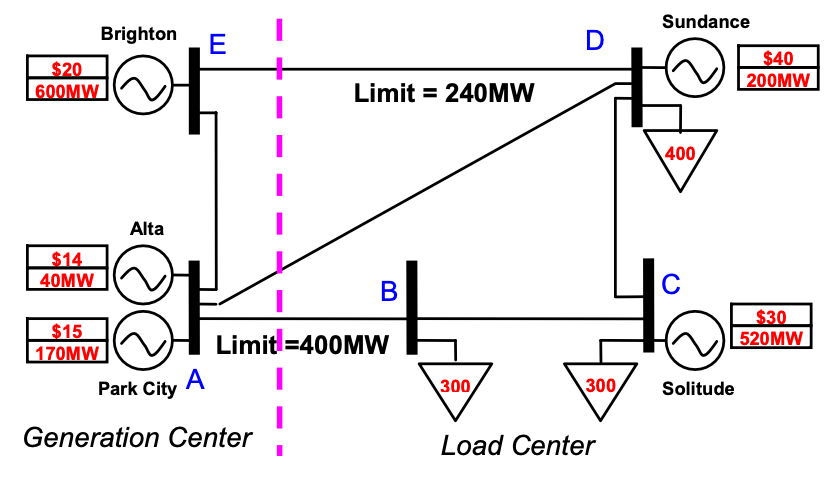

The system is a 5-bus grid with two major zones divided into generation and loads. As you can see from the figure, the nodes represent cities in Utah, MI, in the US. The case file includes a snapshot of the grid including the necessary parameters to calculate a(n) (optimal) power flow calculation. Let's analyze the data step-by-step.

In [4]:
# Load the network for Case5
net = {
    "baseMVA": 100.0,
## area data
    "areas": np.array([[1, 4]]),
## bus data
###	bus_i	type	Pd	Qd	Gs	Bs	area	Vm	Va	baseKV	zone	Vmax	Vmin
    "bus": np.array([
            [1, 2, 0.0, 0.0, 0.0, 0.0, 1, 1.00000, 0.00000, 230.0, 1, 1.10000, 0.90000],
            [2, 1, 300.0, 98.61, 0.0, 0.0, 1, 1.00000, 0.00000, 230.0, 1, 1.10000, 0.90000],
            [3, 2, 300.0, 98.61, 0.0, 0.0, 1, 1.00000, 0.00000, 230.0, 1, 1.10000, 0.90000],
            [4, 3, 400.0, 131.47, 0.0, 0.0, 1, 1.00000, 0.00000, 230.0, 1, 1.10000, 0.90000],
            [5, 2, 0.0, 0.0, 0.0, 0.0, 1, 1.00000, 0.00000, 230.0, 1, 1.10000, 0.90000]
        ]),
## generator data
###	bus	Pg	Qg	Qmax	Qmin	Vg	mBase	status	Pmax	Pmin
    "gen": np.array([
            [1, 20.0, 0.0, 30.0, -30.0, 1.0, 100.0, 1, 40.0, 0.0],
            [1, 85.0, 0.0, 127.5, -127.5, 1.0, 100.0, 1, 170.0, 0.0],
            [3, 260.0, 0.0, 390.0, -390.0, 1.0, 100.0, 1, 520.0, 0.0],
            [4, 100.0, 0.0, 150.0, -150.0, 1.0, 100.0, 1, 200.0, 0.0],
            [5, 300.0, 0.0, 450.0, -450.0, 1.0, 100.0, 1, 600.0, 0.0]
        ]),
## generator cost data
###	2	startup	shutdown	n	c(n-1)	...	c0
    "gencost": np.array([
            [2, 0.0, 0.0, 3, 0.000000, 14.000000, 0.000000],
            [2, 0.0, 0.0, 3, 0.000000, 15.000000, 0.000000],
            [2, 0.0, 0.0, 3, 0.000000, 30.000000, 0.000000],
            [2, 0.0, 0.0, 3, 0.000000, 40.000000, 0.000000],
            [2, 0.0, 0.0, 3, 0.000000, 10.000000, 0.000000]
        ]),
## branch data
###	fbus	tbus	r	x	b	rateA	rateB	rateC	ratio	angle	status	angmin	angmax
    "branch": np.array([
            [1, 2, 0.00281, 0.0281, 0.00712, 400.0, 400.0, 400.0, 0.0, 0.0, 1, -30.0, 30.0],
            [1, 4, 0.00304, 0.0304, 0.00658, 426, 426, 426, 0.0, 0.0, 1, -30.0, 30.0],
            [1, 5, 0.00064, 0.0064, 0.03126, 426, 426, 426, 0.0, 0.0, 1, -30.0, 30.0],
            [2, 3, 0.00108, 0.0108, 0.01852, 426, 426, 426, 0.0, 0.0, 1, -30.0, 30.0],
            [3, 4, 0.00297, 0.0297, 0.00674, 426, 426, 426, 0.0, 0.0, 1, -30.0, 30.0],
            [4, 5, 0.00297, 0.0297, 0.00674, 240.0, 240.0, 240.0, 0.0, 0.0, 1, -30.0, 30.0]
        ])
}



In [5]:
bus = pd.DataFrame(net['bus'],
                   columns=['bus_i', 'type',	'Pd',	'Qd',	'Gs',	'Bs',
                            'area',	'Vm',	'Va',	'baseKV',	'zone',	'Vmax',	'Vmin'])
nbus = len(bus)
bus

,bus_i,type,Pd,Qd,Gs,Bs,area,Vm,Va,baseKV,zone,Vmax,Vmin
0,1.0,2.0,0.0,0.00,0.0,0.0,1.0,1.0,0.0,230.0,1.0,1.1,0.9
1,2.0,1.0,300.0,98.61,0.0,0.0,1.0,1.0,0.0,230.0,1.0,1.1,0.9
2,3.0,2.0,300.0,98.61,0.0,0.0,1.0,1.0,0.0,230.0,1.0,1.1,0.9
3,4.0,3.0,400.0,131.47,0.0,0.0,1.0,1.0,0.0,230.0,1.0,1.1,0.9
4,5.0,2.0,0.0,0.00,0.0,0.0,1.0,1.0,0.0,230.0,1.0,1.1,0.9


There are 5 buses in the system, all of them on the same voltage level at 230 kV and in the same zone (1). The voltage can oscillate between 0.9 and 1.1 per unit. (Note: <i>per unit</i> is a type of measurement unit used to express quantities in power systems; we won't get into the details of this measurement system here.)

There are 3 loads with active (MW) and reactive (VAr) power. The biggest is the load at bus 3 with a maximum power consumption of 400 MW.

In [6]:
gen = pd.DataFrame(net['gen'],
                   columns = ['bus',	'Pg',	'Qg',
                              'Qmax',	'Qmin',	'Vg',
                              'mBase',	'status',	'Pmax',	'Pmin'])
gen

,bus,Pg,Qg,Qmax,Qmin,Vg,mBase,status,Pmax,Pmin
0,1.0,20.0,0.0,30.0,-30.0,1.0,100.0,1.0,40.0,0.0
1,1.0,85.0,0.0,127.5,-127.5,1.0,100.0,1.0,170.0,0.0
2,3.0,260.0,0.0,390.0,-390.0,1.0,100.0,1.0,520.0,0.0
3,4.0,100.0,0.0,150.0,-150.0,1.0,100.0,1.0,200.0,0.0
4,5.0,300.0,0.0,450.0,-450.0,1.0,100.0,1.0,600.0,0.0


Then, we see the generators with different maximum levels of active and reactive power. Notice that the bus variables indicate where the generator is connected on the grid.

In [7]:
line = pd.DataFrame(net['branch'],
                    columns = ['fbus',	'tbus',	'r',	'x',	'b',
                               'rateA',	'rateB',	'rateC',	'ratio',
                               'angle',	'status',	'angmin',	'angmax'] )
line

,fbus,tbus,r,x,b,rateA,rateB,rateC,ratio,angle,status,angmin,angmax
0,1.0,2.0,0.00281,0.0281,0.00712,400.0,400.0,400.0,0.0,0.0,1.0,-30.0,30.0
1,1.0,4.0,0.00304,0.0304,0.00658,426.0,426.0,426.0,0.0,0.0,1.0,-30.0,30.0
2,1.0,5.0,0.00064,0.0064,0.03126,426.0,426.0,426.0,0.0,0.0,1.0,-30.0,30.0
3,2.0,3.0,0.00108,0.0108,0.01852,426.0,426.0,426.0,0.0,0.0,1.0,-30.0,30.0
4,3.0,4.0,0.00297,0.0297,0.00674,426.0,426.0,426.0,0.0,0.0,1.0,-30.0,30.0
5,4.0,5.0,0.00297,0.0297,0.00674,240.0,240.0,240.0,0.0,0.0,1.0,-30.0,30.0


Now, we have 6 lines connecting `from_bus` to `to_bus` with some specific parameters, e.g. resistance (`r`) and reactance (`x`).

In [8]:
gen_cost = pd.DataFrame(net['gencost'],
                        columns = ['order_poly', 'startup', 'shutdown', 'num_coefficient', 'c2', 'c1', 'c0'])
gen_cost

,order_poly,startup,shutdown,num_coefficient,c2,c1,c0
0,2.0,0.0,0.0,3.0,0.0,14.0,0.0
1,2.0,0.0,0.0,3.0,0.0,15.0,0.0
2,2.0,0.0,0.0,3.0,0.0,30.0,0.0
3,2.0,0.0,0.0,3.0,0.0,40.0,0.0
4,2.0,0.0,0.0,3.0,0.0,10.0,0.0


Up until this point, the grid data is static just as a snapshot, and includes data for all parameters, e.g., minimum and maximum voltage at each node, minimum and maximum active and reactive power generation, generation costs, etc.

After looking at the data, we can solve the AC-OPF problem over this power grid configuration. We use [PyPower](https://rwl.github.io/PYPOWER/api/), a Python-based power system solver, to solve the complex AC-OPF problem.

In [9]:
# import the solver and solver options from pypower
from pypower.api import runopf, ppoption

# Run power flow to get results
option = ppoption(OUT_ALL=-1) # set the output details
result = runopf(net, option) # run the ACOPF

PYPOWER Version 5.1.16, 05-March-2023 -- AC Optimal Power Flow
Python Interior Point Solver - PIPS, Version 1.0, 07-Feb-2011
Converged!

Converged in 1.75 seconds
Objective Function Value = 17551.89 $/hr
|     System Summary                                                           |

How many?                How much?              P (MW)            Q (MVAr)
---------------------    -------------------  -------------  -----------------
Buses              5     Total Gen Capacity    1530.0       -1147.5 to 1147.5
Generators         5     On-line Capacity      1530.0       -1147.5 to 1147.5
Committed Gens     5     Generation (actual)   1005.2             371.7
Loads              3     Load                  1000.0             328.7
  Fixed            3       Fixed               1000.0             328.7
  Dispatchable     0       Dispatchable           0.0 of 0.0        0.0
Shunts             0     Shunt (inj)              0.0               0.0
Branches           6     Losses (I^2 * Z)   

It take about 1 second to find the optimal solution to AC-OPF. The detailed results are shown above, including the active/reactive power generation at each generator, the voltage magnitude and voltage angle at each bus, the active/reactive power flow over branches, and the generation costs.

Now that we solved AC-OPF for a specific case on a specific power grid, we can now think about other consumption cases. As we know, we don't consume the same level of electricity at our houses all the time, and the same happens at industrial facilities or with public lighting. The grid is always changing and every second the grid operator must balance the generation with the consumption to keep the grid stable. Given that the real-world grid is very very big and complex, the solution of the AC-OPF becomes cumbersome as the complexity of the problem increases, and the computation needed to solve it is very high.


<a name="ml-ac-opf"></a>
# Machine Learning for AC-OPF


<!-- Another idea would be to use an abstract function approximation which solves the problem for us in much less time than the actual optimization problem as the ACOPF.  -->

<!-- Thanks to recent advances in Machine Learning, we can make use of different algorithms to do this. In this tutorial we will use a Neural Network to predict the ACOPF solution. -->


The use of machine learning (ML) for solving AC-OPF is an evolving area of research that promises to enhance the efficiency and effectiveness of power grid operations. See [ML-OPF-Wiki](https://energy.hosting.acm.org/wiki/index.php/ML_OPF_wiki) for research articles in this area.



## Motivation for Using ML

Since the grid operators need to actively manage the power grid to prevent congestion or even blackouts, there is a need for quicker solvers or approximations to the AC-OPF.

Traditional methods for solving the ACOPF, such as interior point methods, while effective, often encounter challenges related to computational complexity, especially in large-scale grids or under dynamic conditions. These methods can be computationally intensive and slow, which limits their practicality for real-time operations and rapid decision-making required in modern power systems, particularly those integrating variable renewable energy sources.

How about using machine learning to accelerate the solving process? For example, we can use a neural network to directly predict the optimal solution (i.e., power generation, voltage, ...) given the input parameters (i.e., electricity demand).

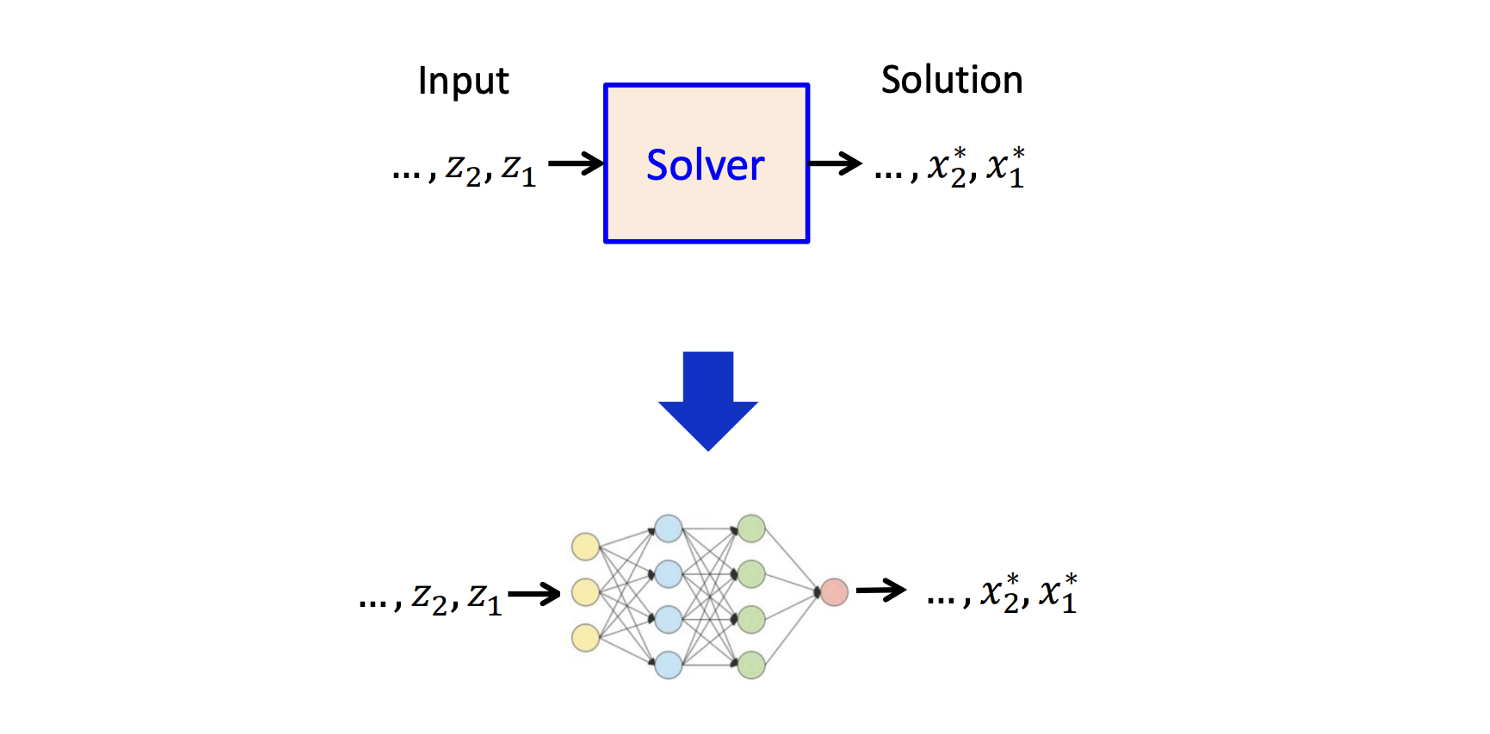

Figure source: [DeepOPF](https://www.mhchen.com/papers/OPF.DeepOPF.SGC.23.pdf)

We follow a supervised learning scheme to train the neural network. To do this, we first need to prepare a training dataset.


## Training Data Generation
The dataset is prepared by solving AC-OPF under different input electricity demands, using a standard optimization solver.

In [ ]:
from pypower import idx_bus, idx_gen, idx_brch
from tqdm import tqdm

nbus = len(net['bus'])
ngen = len(net['gen'])
basemva = net['baseMVA']
PD_base = net['bus'][:, idx_bus.PD]
QD_base = net['bus'][:, idx_bus.QD]

## Let's consider a small datasize
data_size = 10
## We randomly sample load demand from its default value
PD_data = PD_base * np.random.uniform(0.9,1.1,[data_size, 1])
QD_data = QD_base * np.random.uniform(0.9,1.1,[data_size, 1])
PG_data = np.zeros([data_size, ngen])
QG_data = np.zeros([data_size, ngen])
VM_data = np.zeros([data_size, nbus])
VA_data = np.zeros([data_size, nbus])
## Then, for each load demand, we run the solver to obtain the optimal solution.
for i in tqdm(range(data_size)):
  net['bus'][:, idx_bus.PD] = PD_data[i]
  net['bus'][:, idx_bus.QD] = QD_data[i]
  option = ppoption(VERBOSE=0, OUT_ALL=0)
  result = runopf(net, option)
  PG_data[i] = result['gen'][:, idx_gen.PG]
  QG_data[i] = result['gen'][:, idx_gen.QG]
  VM_data[i] = result['bus'][:, idx_bus.VM]
  VA_data[i] = result['bus'][:, idx_bus.VA]


100%|██████████| 10/10 [00:21<00:00,  2.14s/it]


You can follow the data generation scheme to prepare the training dataset.

However, it will take quite a long time. To save some time, let's import a pre-prepared dataset.

<a name="data-description"></a>
## Import Prepared Training Data

The dataset contains different load profiles and their respective optimal solutions. More information on the dataset creation method can be found in the publication, "OPF-Learn: An Open-Source Framework for Creating Representative AC Optimal Power Flow Datasets" and in the package website: [OPFLearn.jl](https://github.com/NREL/OPFLearn.jl) and [OPFLearnData](https://data.nrel.gov/submissions/177).

<!-- Load samples are processed using AC OPF formulations from PowerModels.jl. More information on the dataset creation method can be found in the publication, "OPF-Learn: An Open-Source Framework for Creating Representative AC Optimal Power Flow Datasets" and in the package website: https://github.com/NREL/OPFLearn.jl and https://data.nrel.gov/submissions/177. -->


### Data Download

The following bash script downloads the .csv file from the Case 5 power grid and saves it to a data folder.

In [10]:
# Download data
!mkdir data
!wget https://data.nrel.gov/system/files/177/pglib_opf_case5_pjm.csv -P data/

--2024-07-29 08:30:27--  https://data.nrel.gov/system/files/177/pglib_opf_case5_pjm.csv
Resolving data.nrel.gov (data.nrel.gov)... 13.248.240.147, 76.223.107.85
Connecting to data.nrel.gov (data.nrel.gov)|13.248.240.147|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nrel-datacat-public-prod.s3.us-west-2.amazonaws.com/files/177/pglib_opf_case5_pjm.csv?response-content-disposition=attachment%3B%20filename%3Dpglib_opf_case5_pjm.csv&X-Amz-Content-Sha256=UNSIGNED-PAYLOAD&X-Amz-Security-Token=IQoJb3JpZ2luX2VjEEAaCXVzLXdlc3QtMiJHMEUCIF8Y7S%2FFM9JkNc5FOctyyO3aJneWwa8Pel0O7THIRd5sAiEA71PcnXNnhiwI%2BYPzVhHhhaODvgicpluCmXXiCxHYqGEq5QMIKRAAGgw5OTE0MDQ5NTYxOTQiDA1D5ov0pQXNB9ioAirCA7vKsr79OyWC0POpFLySkGLTE2Qa7GtkyJHFPikZbehGN9JJFGBFYkg1GjR5Xc53d7P1%2BFiyWsRRC28ZIHAGcY9poDpLeytCkuEMjOcz5n5Kxp%2FYXEdIqg0G1gG8bjFTzToc6YaZlffdAjRKReoQ3hIwQsNvFcHRGNjA0IXNVQg7hMBJWt7XKHspWwZ6htHQP%2B0A0y0e0UhQGBfL3YvsoKluDwxodGcNM2EwXziXmZ2H3JCg86e1BKkppyfhUYFdsMvk8dAjQDI7Fx26D%2BfR

### Data Exploration
Now, we will look into the data that we downloaded. Take into account that this dataset is specific for a grid called Case 5 from an energy market in the US called PJM. This will be explained in the next section. For now, let's focus on getting a glimpse of the data.

In [11]:
df = pd.read_csv('data/pglib_opf_case5_pjm.csv')
df.head()

,load1:pl,load2:pl,load3:pl,load1:ql,load2:ql,load3:ql,gen1:pg,gen2:pg,gen3:pg,gen4:pg,...,line3:p_fr_max,line4:p_fr_max,line5:p_fr_max,line6:p_fr_max,line1:q_fr_max,line2:q_fr_max,line3:q_fr_max,line4:q_fr_max,line5:q_fr_max,line6:q_fr_max
0,6.570765,2.275993,4.051883,4.376283,0.628149,4.026378,0.4,1.7,4.876424,1.558644,...,-0.000002,-0.000003,-2.720498e-07,-0.000006,0.000000e+00,0.0,-7.933284e-07,-1.873404e-06,0.0,-3.069352e-06
1,6.552550,1.704638,4.090173,4.400894,0.724693,3.937011,0.4,1.7,4.317437,1.531758,...,-0.000002,-0.000003,-2.624331e-07,-0.000006,0.000000e+00,0.0,-7.848656e-07,-1.892890e-06,0.0,-2.936123e-06
2,5.645406,2.029723,5.955067,1.377338,0.865517,3.240306,0.4,1.7,5.199999,1.490930,...,-0.000002,-0.000002,0.000000e+00,-0.000280,-1.365476e-07,0.0,0.000000e+00,-8.479213e-07,0.0,-3.177477e-07
3,4.778645,2.417017,6.361179,0.843277,0.881531,2.635903,0.4,1.7,5.200000,1.644658,...,-0.000001,-0.000001,0.000000e+00,-0.647117,-3.141235e-07,0.0,0.000000e+00,-7.238938e-07,0.0,-6.550166e-09
4,5.690040,2.458801,5.745494,2.003454,1.119158,3.286294,0.4,1.7,5.200000,1.684051,...,-0.000002,-0.000002,-5.028490e-09,-0.000067,0.000000e+00,0.0,0.000000e+00,-9.201327e-07,0.0,-6.686726e-07


In [12]:
df.shape

(10000, 104)

In [13]:
df.columns

Index(['load1:pl', 'load2:pl', 'load3:pl', 'load1:ql', 'load2:ql', 'load3:ql',
       'gen1:pg', 'gen2:pg', 'gen3:pg', 'gen4:pg',
       ...
       'line3:p_fr_max', 'line4:p_fr_max', 'line5:p_fr_max', 'line6:p_fr_max',
       'line1:q_fr_max', 'line2:q_fr_max', 'line3:q_fr_max', 'line4:q_fr_max',
       'line5:q_fr_max', 'line6:q_fr_max'],
      dtype='object', length=104)

We can see that this is a dataset of 10000 rows by 104 columns. Each row represents the feature and solution of the AC-OPF. Let's define the inputs and outputs for the machine learning model based on the AC-OPF formulation we have learned.
<!-- The columns are specified at the [OPFLearn.jl](https://nrel.github.io/OPFLearn.jl/stable/results/). In general, they are divided into inputs and outputs depending on the variable. -->

For example, columns 0:3 represent the active power consumption for the loads, while columns 3:6 represent the reactive power consumption of the loads. We can now separate them into a variable called `inputs`, which means they are the input parameters for the AC-OPF problem.

In [14]:
# Define input columns
load_p = list(df.columns[0:3])
load_q = list(df.columns[3:6])
inputs = load_p + load_q
print(inputs)

['load1:pl', 'load2:pl', 'load3:pl', 'load1:ql', 'load2:ql', 'load3:ql']


Now, we can do the same with the outputs, i.e., the optimal solution for the AC-OPF problem given load demand, which includes the active and reactive power at each generator as well as the voltage magnitude and angle at each bus.

In [15]:
# Define output columns
gen_p = list(df.columns[6:11])
gen_q = list(df.columns[11:16])
def convert(x):
    # Remove spaces around the '+' or '-' before 'j'
    x = x.replace(" + ", "+").replace(" - ", "-").replace("j", "j").strip()
    return np.complex64(x)
bus_vm = []
bus_va = []
for bus_v_column in df.columns[21:26]:
  df[bus_v_column + '_mag'] = df[bus_v_column].apply(convert).apply(np.abs)
  bus_vm.append(bus_v_column + '_mag')
  df[bus_v_column + '_ang'] = df[bus_v_column].apply(convert).apply(np.angle)
  ## the follow line of code is to correct a bug in the OPFLearn dataset
  df[bus_v_column + '_ang'] = -1*np.rad2deg(df[bus_v_column + '_ang'].values)
  bus_va.append(bus_v_column + '_ang')
outputs = gen_p + gen_q + bus_vm + bus_va
print(outputs)

['gen1:pg', 'gen2:pg', 'gen3:pg', 'gen4:pg', 'gen5:pg', 'gen1:qg', 'gen2:qg', 'gen3:qg', 'gen4:qg', 'gen5:qg', 'bus1:v_bus_mag', 'bus2:v_bus_mag', 'bus3:v_bus_mag', 'bus4:v_bus_mag', 'bus5:v_bus_mag', 'bus1:v_bus_ang', 'bus2:v_bus_ang', 'bus3:v_bus_ang', 'bus4:v_bus_ang', 'bus5:v_bus_ang']


Now that we separated the data into inputs and outputs, let's take a look into each of those columns. The following function plots the histogram of each variable, so it takes the whole 10000 samples for each variable and plots the distribution. On the x-axis we see the variable value, and on the y axis the frequency of samples that fit into a specific bucket or bin. We will be using 10 bins just to get an idea of the shape of the distribution. Notice that we are also annotating the mean of all the samples in black.

In [16]:
def plot_hist_variables(variables):
    fig, axs = plt.subplots(nrows=1, ncols=len(variables), figsize=(16, 3))
    for i, input_name in enumerate(variables):
        axs[i].hist(df[input_name], bins=10, density=True)
        axs[i].set_title(input_name, fontsize=18)
        mean_value = df[input_name].mean()
        axs[i].axvline(mean_value, color='k', linestyle='dashed', linewidth=2)
        x_offset = axs[i].get_xlim()[1] * 0.02
        y_offset = axs[i].get_ylim()[1] * 0.05
        axs[i].annotate(f"Mean: {mean_value:.2f}", xy=(mean_value, axs[i].get_ylim()[1]),
                        xytext=(mean_value+x_offset, axs[i].get_ylim()[1]-y_offset),
                        ha='left', va='top', fontsize=14,
                        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
        if 'pl' in input_name: axs[i].set_xlabel('active load (p.u.)', fontsize=14)
        elif 'ql' in input_name: axs[i].set_xlabel('reactive load (p.u.)', fontsize=14)
        elif 'pg' in input_name: axs[i].set_xlabel('active gen (p.u.)', fontsize=14)
        elif 'qg' in input_name: axs[i].set_xlabel('reactive gen (p.u.)', fontsize=14)
        elif 'mag' in input_name: axs[i].set_xlabel('bus vol. mag. (p.u.)', fontsize=14)
        elif 'ang' in input_name: axs[i].set_xlabel('bus vol. ang. (rad.)', fontsize=14)
    fig.tight_layout()
    plt.show()

#### Inputs

**Active** & **Reactive** power of each load:

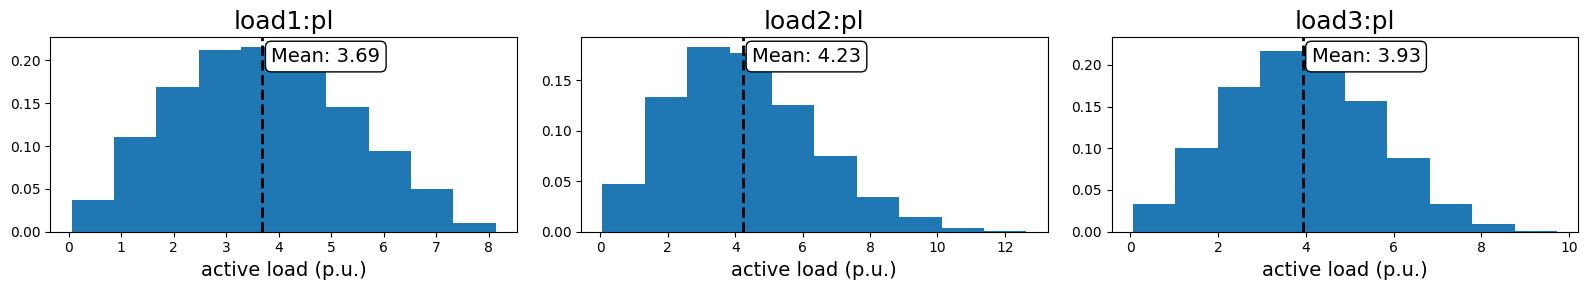

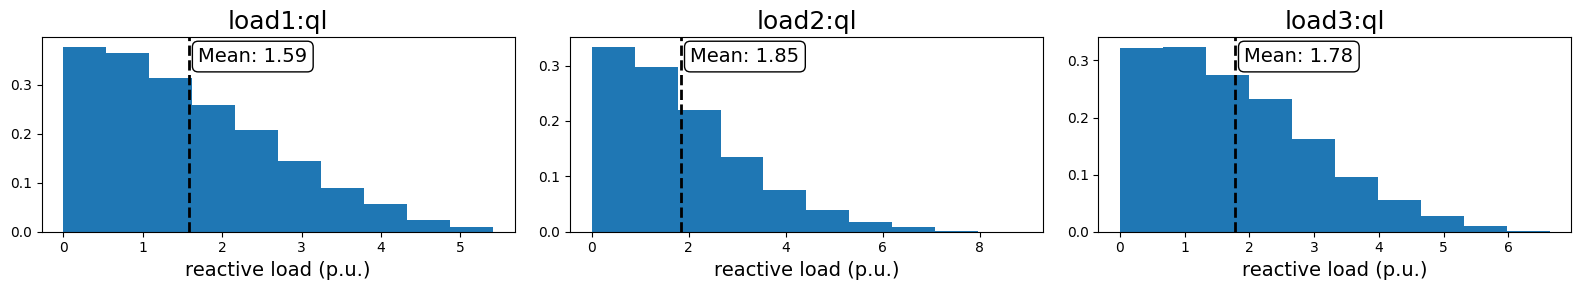

In [17]:
plot_hist_variables(load_p)
plot_hist_variables(load_q)

As you can see, both active and reactive power variables are positive. This makes sense as we can't consume "negative" power by definition. However, this really depends on the choice of mathematical convention in this case; you will see that generators can "generate negative" reactive power.

The shapes of the distributions of both variables are a bit different, where active power can be generalized as a `Normal` distribution, while the reactive power looks like an `Exponential` or `Log(Normal)` distribution.

#### Outputs

**Active** & **Reactive** power of each generator:

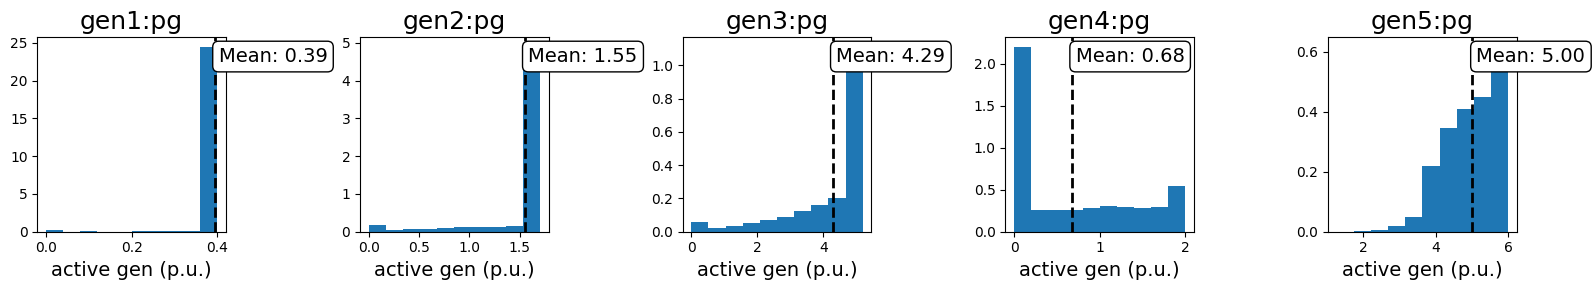

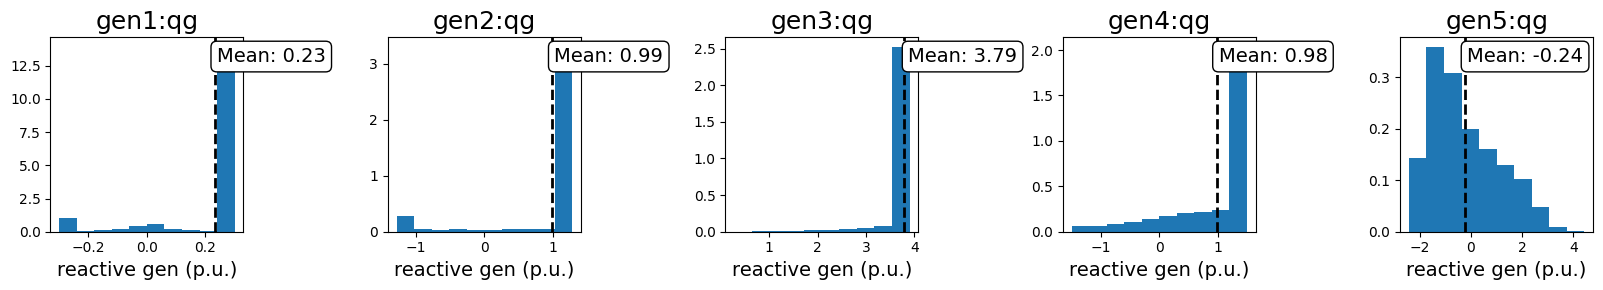

In [18]:
plot_hist_variables(gen_p)
plot_hist_variables(gen_q)

Voltage **Mangnitude** & **Angle** at each bus:

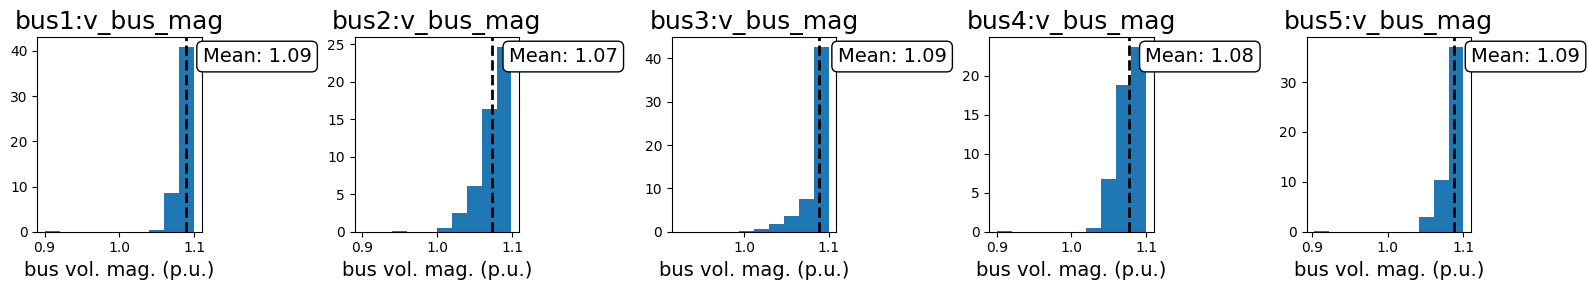

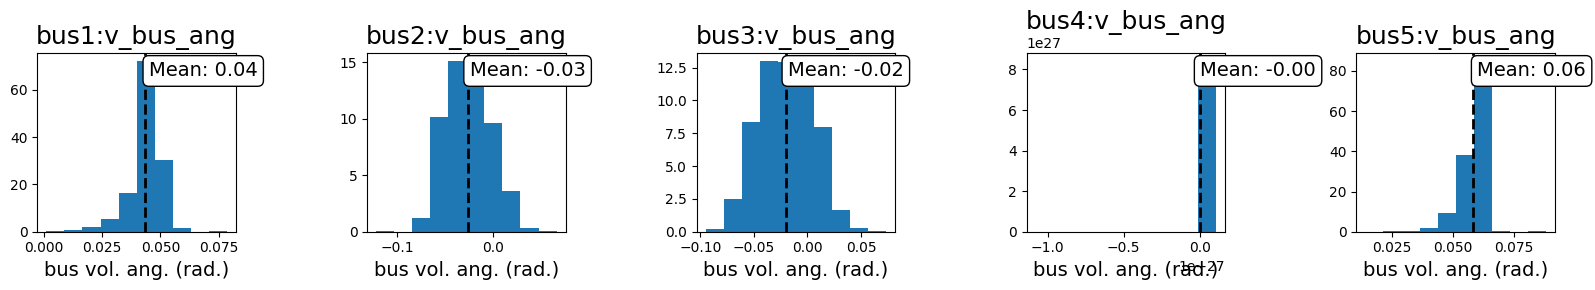

In [19]:
plot_hist_variables(bus_vm)
plot_hist_variables(bus_va)

In the case of the generations, we can see that generators' setpoints are set almost always at the same level most of the time. Notice that some generators are generating "negative" reactive power. This means, by convention, that sometimes these generators are consuming reactive power instead of generating.

In the case of voltage magnitudes, it is very constant around the mean with a few samples below that level. This is expected as the voltage magnitude values are constrained by the AC-OPF problem.

So far, we have defined the inputs and outputs for the AC-OPF problem as well as the training dataset for it. Next, we will use a neural network (NN) to solve AC-OPF.

<a name="training"></a>
## Case Study: NN for Solving ACOPF

### NN definition
Let's prepare the neural network we want to use to solve AC-OPF. We will use a vanilla NN for this tutorial.

In [ ]:
torch.cuda.is_available()
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


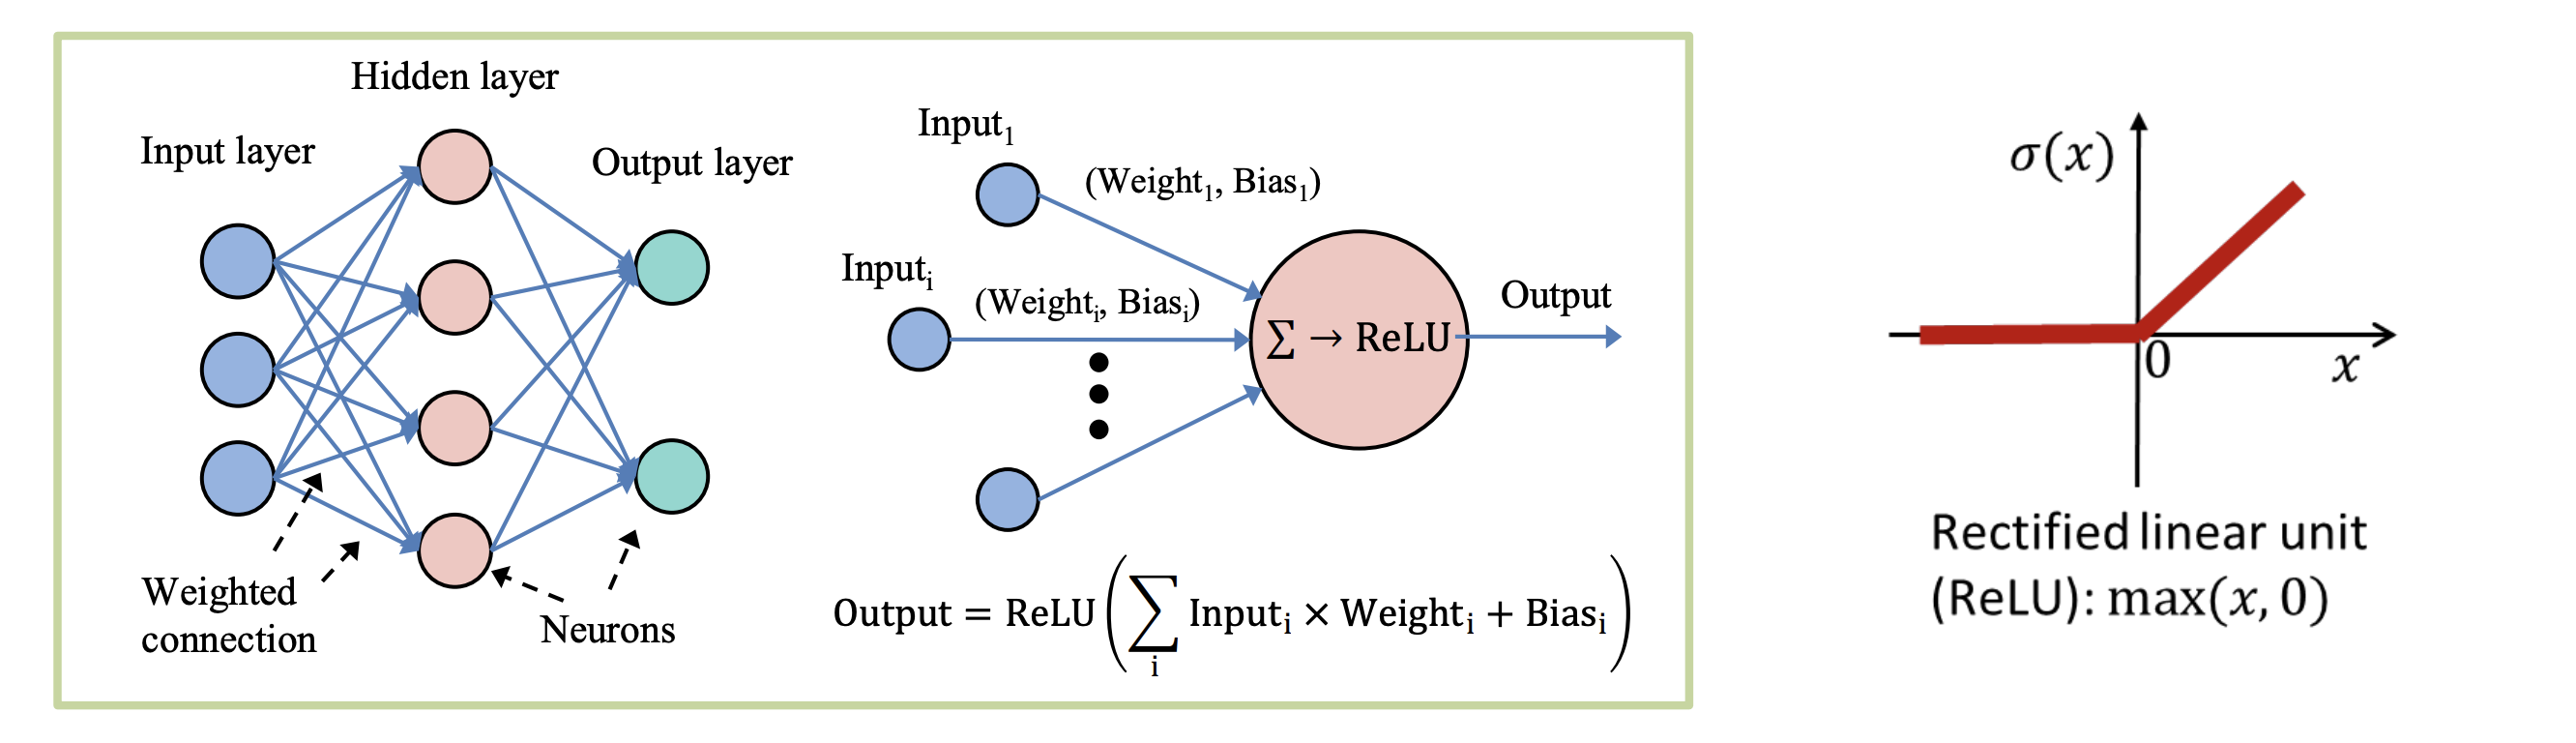

Figure source: [DeepOPF](https://www.mhchen.com/papers/OPF.DeepOPF.SGC.23.pdf)

In [ ]:
# Define a simple NN model
class NeuralNetwork(nn.Module):
    def __init__(self, x_size=3, y_size=5, width=32, depth=2):
        super().__init__()
        NN = [nn.Linear(x_size, width)]
        for _ in range(depth):
          NN.append(nn.Linear(width, width))
          NN.append(nn.ReLU())
        NN.append(nn.Linear(width, y_size))
        self.NN = nn.Sequential(*NN)

    def forward(self, x):
        y = self.NN(x)
        return y

model_base = NeuralNetwork(x_size=len(inputs),
                      y_size=len(outputs),
                      width=32,
                      depth=2).to(device)
print(f'NN with input dim {len(inputs)} and outpput dim {len(outputs)}')

NN with input dim 6 and outpput dim 20


### Training preparation

Now let's define a few functions to help us train a neural network. Notice that we will be choosing a few objectives that could be changed, together with the hyperparameters: optimizer, batch size, number of epochs, and loss function.

In [ ]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model_base.parameters(), lr=1e-3)

Now, we can define the training and testing functions:

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    with torch.enable_grad():
      for batch, (X, y) in enumerate(dataloader):
          X, y = X.to(device), y.to(device)

          # Compute prediction error
          pred = model(X)
          loss = loss_fn(pred, y)
          # Backpropagation

          loss.backward()
          optimizer.step()
          optimizer.zero_grad()

          if batch % 10 == 0:
              loss, current = loss.item(), (batch) * len(X)
              print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
    test_loss /= num_batches
    print(f"Test Error: \n Avg loss: {test_loss:>8f} \n")

For the data, we will pack the pandas DataFrame into a Pytorch Dataloader object and split the dataset into training and test using an 80/20 split.

In [ ]:
class OPFDataset(Dataset):
    def __init__(self, data, inputs, outputs):
        self.data = data
        self.inputs = inputs
        self.outputs = outputs

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        input = torch.tensor(self.data.iloc[idx,:len(self.inputs)].values).to(torch.float32)
        output = torch.tensor(self.data.iloc[idx, len(self.inputs):].values).to(torch.float32)
        return input, output

In [ ]:
data = df[inputs + outputs]
train_data = data.sample(frac=0.8, random_state=SEED)
test_data = data.drop(train_data.index)
print(f'training data size: f{train_data.shape}, test data size: {test_data.shape}')

training data size: f(8000, 26), test data size: (2000, 26)


Then, we define a dataset and put them into dataloaders:

In [ ]:
train_dataloader = DataLoader(OPFDataset(train_data, inputs, outputs),
                              batch_size=128, shuffle=True)
test_dataloader = DataLoader(OPFDataset(test_data, inputs, outputs),
                             batch_size=128, shuffle=True)

### Let's Train!

Finally, let's train the neural network to fit our dataset:



In [ ]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model_base, loss_fn, optimizer)
    test(test_dataloader, model_base, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 4.082420  [    0/ 8000]
loss: 3.606107  [ 1280/ 8000]
loss: 3.016641  [ 2560/ 8000]
loss: 2.106516  [ 3840/ 8000]
loss: 1.059224  [ 5120/ 8000]
loss: 0.558837  [ 6400/ 8000]
loss: 0.359040  [ 7680/ 8000]
Test Error: 
 Avg loss: 0.325342 

Epoch 2
-------------------------------
loss: 0.323879  [    0/ 8000]
loss: 0.287021  [ 1280/ 8000]
loss: 0.251586  [ 2560/ 8000]
loss: 0.265715  [ 3840/ 8000]
loss: 0.276212  [ 5120/ 8000]
loss: 0.258445  [ 6400/ 8000]
loss: 0.234806  [ 7680/ 8000]
Test Error: 
 Avg loss: 0.248940 

Epoch 3
-------------------------------
loss: 0.247237  [    0/ 8000]
loss: 0.254586  [ 1280/ 8000]
loss: 0.261471  [ 2560/ 8000]
loss: 0.224545  [ 3840/ 8000]
loss: 0.228759  [ 5120/ 8000]
loss: 0.214557  [ 6400/ 8000]
loss: 0.209436  [ 7680/ 8000]
Test Error: 
 Avg loss: 0.202158 

Epoch 4
-------------------------------
loss: 0.211896  [    0/ 8000]
loss: 0.169675  [ 1280/ 8000]
loss: 0.177801  [ 2560/ 8000]
loss: 0.196813 

<a name="results-and-discussion"></a>
# Results & Discussion

## Evaluation Metric for AC-OPF

Now that we have a trained model to "solve" AC-OPF, which predicts the power generation and bus voltage values given the electricity load demand. We use a mean squared error (MSE) loss function to train the NN model and evaluate it on the test dataset.

Wait a minute! How do we know the NN is "good" enough to solve AC-OPF?

Let's go back to the AC-OPF problem itself. What do you think about the metric that we used to train the network?

In general, we care about three metrics
1. **Feasibility**: The solution needs to satisfy the equality & inequality constraints of the optimization problem.
2. **Optimality**: The feasibile solution incurs the lowest cost compared with all other feasible solutions.
3. **Run-time complexity**: We solve the problem fast.

In our case, we apply a NN to predict the solution for AC-OPF. Let's evaluate NN based on these metrics.

Let's take a look at a single snapshot

In [ ]:
batch_snapshot = next(iter(test_dataloader))
snapshot_x, snapshot_y = batch_snapshot[0][[0]], batch_snapshot[1][[0]]

In [ ]:
snapshot_x

tensor([[2.4994, 5.3052, 4.5316, 0.8896, 2.2668, 1.2205]])

And the optimal solution of the AC-OPF, i.e. power generation and voltage, as produced by the traditional optimization solver.

In [ ]:
snapshot_y

tensor([[ 4.0000e-01,  1.7000e+00,  5.2000e+00,  4.9790e-01,  4.5809e+00,
          3.0000e-01,  1.2750e+00,  3.9000e+00,  5.4139e-01, -1.3053e+00,
          1.0946e+00,  1.0900e+00,  1.1000e+00,  1.0833e+00,  1.0882e+00,
          4.8056e-02, -7.9392e-03, -7.6186e-03,  5.1292e-34,  6.0469e-02]])

Now, we use a NN to predict the solution, and evaluate its performance.

In [ ]:
import time
st = time.time()
with torch.no_grad():
    snapshot_pred = model_base(snapshot_x.to(device))
et = time.time()

Fisrt, how about the running time?


In [ ]:
et-st

0.0018854141235351562

It only takes 0.001 second to get the solution of AC-OPF using the NN, while the PyPower solver takes 1 second to solve AC-OPF in case study of the PJM 5 network.

Next, how about the solution quality?

This would tell us the MSE of our solution vs. the real AC OPF solution:

In [ ]:
loss_fn(snapshot_pred, snapshot_y.to(device)).item()

0.026148740202188492

What do you think about this metric? Can we use something better to evaluate?

Remember that by solving the AC-OPF, the objective function is defined as the cost of generating power.

In [ ]:
# Let's find the generation cost
linear_cost = net['gencost'][:,5]
cost_coef = torch.tensor(linear_cost).to(torch.float32)
def calculate_grid_cost(outputs, cost_coef):
  """Function to calculate grid costs based on generator levels."""
  pg = outputs[:, :5]
  return (pg * cost_coef).sum(1)

In [ ]:
pred_grid_cost = calculate_grid_cost(snapshot_pred, cost_coef)[0]
opt_grid_cost = calculate_grid_cost(snapshot_y, cost_coef)[0]
print(f"grid_cost for predicted solution is {pred_grid_cost:.4f}")
print(f"grid_cost for optimal solution is {opt_grid_cost:.4f}")
print(f"optimality gap is {(pred_grid_cost - opt_grid_cost)/(opt_grid_cost)*100:.2f}%")

grid_cost for predicted solution is 257.5766
grid_cost for optimal solution is 252.8253
optimality gap is 1.88%


Unfortunately, the solution predicted by the vanilla NN incurs more cost than the optimal solution.

Now, let's find the constraint violation.

First, let's calculate the upper/lower bound of the output decisions.

In [ ]:
basemva = net['baseMVA']
pg_max = gen['Pmax'].values / basemva
pg_min = gen['Pmin'].values / basemva
qg_max = gen['Qmax'].values / basemva
qg_min = gen['Qmin'].values / basemva
vm_max = bus['Vmax'].values
vm_min = bus['Vmin'].values
va_max = [np.pi for i in range(len(bus))]
va_min = [-np.pi for i in range(len(bus))]

outputs_min = np.concatenate([pg_min, qg_min, vm_min, va_min])
outputs_max = np.concatenate([pg_max, qg_max, vm_max, va_max])
outputs_min = torch.as_tensor(outputs_min).to(torch.float32).view(1,-1)
outputs_max = torch.as_tensor(outputs_max).to(torch.float32).view(1,-1)

def upper_lower_bound_constraint(outputs, outputs_max, output_min):
  return torch.relu(outputs - outputs_max) + torch.relu(outputs_min - outputs)

In [ ]:
vio_1 = upper_lower_bound_constraint(snapshot_pred, outputs_max, outputs_min)
print(f'total upper/lower bound violation: {vio_1.sum():.4f}')

total upper/lower bound violation: 0.0882


Second, let's calculate the power flow equation constraint violation.

In [ ]:
from pypower.api import makeYbus, ext2int
net = ext2int(net)
# Calculate the bus admittance matrix (Ybus) and branch admittance matrices (Yf, Yt)
Ybus, Yf, Yt = makeYbus(net['baseMVA'], net['bus'], net['branch'])
Ybus = Ybus.todense()
Yf = Yf.todense()
gen_bus_index = net['gen'][:,idx_gen.GEN_BUS]
load_bus_index = [i for i in range(5) if net['bus'][i, idx_bus.PD]>0]

def gen_load_to_bus(inputs, outputs):
  batch = inputs.shape[0]
  pd = inputs[:, :3]
  qd = inputs[:, 3:]
  pg = outputs[:, 0:5]
  qg = outputs[:, 5:10]
  bus_pg = torch.zeros([batch, 5])
  bus_qg = torch.zeros([batch, 5])
  for i, bus_index in enumerate(gen_bus_index):
    bus_pg[:,int(bus_index)] += pg[:, i]
    bus_qg[:,int(bus_index)] += qg[:, i]

  bus_pd = torch.zeros([batch, 5])
  bus_qd = torch.zeros([batch, 5])
  for i, bus_index in enumerate(load_bus_index):
    bus_pd[:,bus_index] += pd[:, i]
    bus_qd[:,bus_index] += qd[:, i]

  return bus_pg, bus_qg, bus_pd, bus_qd

def power_flow_constraint(inputs, outputs, Ybus):
  bus_pg, bus_qg, bus_pd, bus_qd = gen_load_to_bus(inputs, outputs)
  bus_p_inj = bus_pg - bus_pd
  bus_q_inj = bus_qg - bus_qd
  vm, va = outputs[:, 10:15], outputs[:, 15:20]
  # v = vm * np.exp(1j * va)
  # I = np.matmul(v, Ybus)
  # P = np.multiply(v,I.conj())
  vr = vm * torch.cos(va)
  vi = vm * torch.sin(va)
  Ir = vr @ Ybus.real - vi @ Ybus.imag
  Ii = vi @ Ybus.real + vr @ Ybus.imag
  bus_p = (vr * Ir) + (vi * Ii)
  bus_q = (vi * Ir) - (vr * Ii)

  return torch.abs(bus_p_inj - bus_p), torch.abs(bus_q_inj - bus_q)

In [ ]:
act_mis, rea_mis = power_flow_constraint(snapshot_x, snapshot_pred, Ybus)
print(f'total active power mismatch: {act_mis.sum():.4f}, ' \
      f'total reactive power mismatch: {rea_mis.sum():.4f}')

total active power mismatch: 13.5465, total reactive power mismatch: 14.9095


And third, let's calculate the branch flow & angle constraint violation.

In [ ]:
def branch_flow_constraont(outputs, Yf, Yt, line):
  fbus = line['fbus'].apply(int).values - 1
  tbus = line['tbus'].apply(int).values - 1
  vm, va = outputs[:, 10:15], outputs[:, 15:20]
  vr = vm * torch.cos(va)
  vi = vm * torch.sin(va)
  Ir = vr @ Yf.real.T - vi @ Yf.imag.T
  Ii = vi @ Yf.real.T + vr @ Yf.imag.T
  branch_p = torch.multiply(vr[:, fbus], Ir) + torch.multiply(vi[:,fbus], Ii)
  branch_q = torch.multiply(vi[:, fbus], Ir) - torch.multiply(vr[:,fbus], Ii)
  s = torch.sqrt((torch.square(branch_p) +  torch.square(branch_q)))
  smax = line['rateA'].values / 100

  branch_ang = torch.abs(va[:, fbus] - va[:, tbus])
  angmax = np.deg2rad(line['angmax'].values)

  return torch.relu(s-smax ), torch.relu(branch_ang - angmax)

In [ ]:
flow, angle = branch_flow_constraont(snapshot_pred, Yf, Yt, line)
print(f'branch flow violation: {flow.sum():.4f}, ',\
      f'branch angle violation: {angle.max():.4f}')

branch flow violation: 0.9854,  branch angle violation: 0.0000


After evaluation, the trained vanilla NN does not seem good enough for solving AC-OPF (due to the large optimality gap and the large constraint violations).

In the next exercise section, we will improve NN performance with respect to both optimality and feasibility.

## Exercise: Improve your NN

In the following exercises, we will go through several critical questions in the intersection of machine learning and optimal power flow, including
1. **Tuning Your Neural Network**: We will aim to gain a better understanding of the NN's ability to approximate the complex mapping represented by the AC-OPF problem.
2. **Enforcing Physical Limits**: We will try to enforce that the NN output satisfy the constraints of the AC-OPF problem, which is critical in safe operation of power grid.
3. **Data-efficient Training**: We will implement a self-supervised loss function to train the NN efficiently without needing to generate "ground-truth" solutions from a traditional optimization solver.

### Preparation

To make the exercise self-contained, we will first import the packages and data as done in the previous exercise.

In [20]:
!pip install pypower --quiet

In [21]:
# Data visualization
import matplotlib.pyplot as plt
# Data manipulation
import pandas as pd
import numpy as np
import os
# Deep learning framework
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from pypower import idx_bus, idx_gen, idx_brch, idx_cost
from pypower.api import makeYbus, ext2int

# For reproducibility
SEED = 2024
torch.manual_seed(SEED)
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [22]:
# Load the network for Case5
net = {
    "baseMVA": 100.0,
## area data
    "areas": np.array([[1, 4]]),
## bus data
###	bus_i	type	Pd	Qd	Gs	Bs	area	Vm	Va	baseKV	zone	Vmax	Vmin
    "bus": np.array([
            [1, 2, 0.0, 0.0, 0.0, 0.0, 1, 1.00000, 0.00000, 230.0, 1, 1.10000, 0.90000],
            [2, 1, 300.0, 98.61, 0.0, 0.0, 1, 1.00000, 0.00000, 230.0, 1, 1.10000, 0.90000],
            [3, 2, 300.0, 98.61, 0.0, 0.0, 1, 1.00000, 0.00000, 230.0, 1, 1.10000, 0.90000],
            [4, 3, 400.0, 131.47, 0.0, 0.0, 1, 1.00000, 0.00000, 230.0, 1, 1.10000, 0.90000],
            [5, 2, 0.0, 0.0, 0.0, 0.0, 1, 1.00000, 0.00000, 230.0, 1, 1.10000, 0.90000]
        ]),
## generator data
###	bus	Pg	Qg	Qmax	Qmin	Vg	mBase	status	Pmax	Pmin
    "gen": np.array([
            [1, 20.0, 0.0, 30.0, -30.0, 1.0, 100.0, 1, 40.0, 0.0],
            [1, 85.0, 0.0, 127.5, -127.5, 1.0, 100.0, 1, 170.0, 0.0],
            [3, 260.0, 0.0, 390.0, -390.0, 1.0, 100.0, 1, 520.0, 0.0],
            [4, 100.0, 0.0, 150.0, -150.0, 1.0, 100.0, 1, 200.0, 0.0],
            [5, 300.0, 0.0, 450.0, -450.0, 1.0, 100.0, 1, 600.0, 0.0]
        ]),
## generator cost data
###	2	startup	shutdown	n	c(n-1)	...	c0
    "gencost": np.array([
            [2, 0.0, 0.0, 3, 0.000000, 14.000000, 0.000000],
            [2, 0.0, 0.0, 3, 0.000000, 15.000000, 0.000000],
            [2, 0.0, 0.0, 3, 0.000000, 30.000000, 0.000000],
            [2, 0.0, 0.0, 3, 0.000000, 40.000000, 0.000000],
            [2, 0.0, 0.0, 3, 0.000000, 10.000000, 0.000000]
        ]),
## branch data
###	fbus	tbus	r	x	b	rateA	rateB	rateC	ratio	angle	status	angmin	angmax
    "branch": np.array([
            [1, 2, 0.00281, 0.0281, 0.00712, 400.0, 400.0, 400.0, 0.0, 0.0, 1, -30.0, 30.0],
            [1, 4, 0.00304, 0.0304, 0.00658, 426, 426, 426, 0.0, 0.0, 1, -30.0, 30.0],
            [1, 5, 0.00064, 0.0064, 0.03126, 426, 426, 426, 0.0, 0.0, 1, -30.0, 30.0],
            [2, 3, 0.00108, 0.0108, 0.01852, 426, 426, 426, 0.0, 0.0, 1, -30.0, 30.0],
            [3, 4, 0.00297, 0.0297, 0.00674, 426, 426, 426, 0.0, 0.0, 1, -30.0, 30.0],
            [4, 5, 0.00297, 0.0297, 0.00674, 240.0, 240.0, 240.0, 0.0, 0.0, 1, -30.0, 30.0]
        ])
}

In [23]:
# Load the training dataset
if not os.path.exists('data/pglib_opf_case5_pjm.csv'):
  # Download data
  !mkdir data
  !wget https://data.nrel.gov/system/files/177/pglib_opf_case5_pjm.csv -P data/
df = pd.read_csv('data/pglib_opf_case5_pjm.csv')

# Define input columns
# Define input columns
load_p = list(df.columns[0:3])
load_q = list(df.columns[3:6])
inputs = load_p + load_q
print(inputs)
# Define output columns
gen_p = list(df.columns[6:11])
gen_q = list(df.columns[11:16])
def convert(x):
    # Remove spaces around the '+' or '-' before 'j'
    x = x.replace(" + ", "+").replace(" - ", "-").replace("j", "j").strip()
    return np.complex64(x)
bus_vm = []
bus_va = []
for bus_v_column in df.columns[21:26]:
  df[bus_v_column + '_mag'] = df[bus_v_column].apply(convert).apply(np.abs)
  bus_vm.append(bus_v_column + '_mag')
  df[bus_v_column + '_ang'] = df[bus_v_column].apply(convert).apply(np.angle)
  df[bus_v_column + '_ang'] = -1*np.rad2deg(df[bus_v_column + '_ang'].values)
  bus_va.append(bus_v_column + '_ang')
outputs = gen_p + gen_q + bus_vm + bus_va
print(outputs)

class OPFDataset(Dataset):
    def __init__(self, data, inputs, outputs):
        self.data = data
        self.inputs = inputs
        self.outputs = outputs

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        input = torch.tensor(self.data.iloc[idx,:len(self.inputs)].values).to(torch.float32)
        output = torch.tensor(self.data.iloc[idx, len(self.inputs):].values).to(torch.float32)
        return input, output

data = df[inputs + outputs]
train_data = data.sample(frac=0.8, random_state=SEED)
test_data = data.drop(train_data.index)
train_dataloader = DataLoader(OPFDataset(train_data, inputs, outputs),
                              batch_size=128, shuffle=True)
test_dataloader = DataLoader(OPFDataset(test_data, inputs, outputs),
                             batch_size=128, shuffle=True)

['load1:pl', 'load2:pl', 'load3:pl', 'load1:ql', 'load2:ql', 'load3:ql']
['gen1:pg', 'gen2:pg', 'gen3:pg', 'gen4:pg', 'gen5:pg', 'gen1:qg', 'gen2:qg', 'gen3:qg', 'gen4:qg', 'gen5:qg', 'bus1:v_bus_mag', 'bus2:v_bus_mag', 'bus3:v_bus_mag', 'bus4:v_bus_mag', 'bus5:v_bus_mag', 'bus1:v_bus_ang', 'bus2:v_bus_ang', 'bus3:v_bus_ang', 'bus4:v_bus_ang', 'bus5:v_bus_ang']


In [24]:
# Define the evaluation metric as we did in the discussion
class OPF_metric():
  def __init__(self, net):
    basemva = net['baseMVA']
    linear_cost = net['gencost'][:, 5]
    self.cost_coef = torch.tensor(linear_cost).to(torch.float32)

    pg_max = net['gen'][:, idx_gen.PMAX] / basemva
    pg_min = net['gen'][:, idx_gen.PMIN] / basemva
    qg_max = net['gen'][:, idx_gen.QMAX] / basemva
    qg_min = net['gen'][:, idx_gen.QMIN] / basemva
    vm_max = net['bus'][:, idx_bus.VMAX]
    vm_min = net['bus'][:, idx_bus.VMIN]
    va_max = [np.pi/2 for i in range(len(net['bus']))]
    va_min = [-np.pi/2 for i in range(len(net['bus']))]
    outputs_min = np.concatenate([pg_min, qg_min, vm_min, va_min])
    outputs_max = np.concatenate([pg_max, qg_max, vm_max, va_max])
    self.outputs_min = torch.as_tensor(outputs_min).to(torch.float32).view(1,-1)
    self.outputs_max = torch.as_tensor(outputs_max).to(torch.float32).view(1,-1)

    # Calculate the bus admittance matrix (Ybus) and branch admittance matrices (Yf, Yt)
    net = ext2int(net)
    Ybus, Yf, Yt = makeYbus(net['baseMVA'], net['bus'], net['branch'])
    Ybus = Ybus.todense()
    self.Ybus_real = torch.as_tensor(Ybus.real).to(torch.float32)
    self.Ybus_imag = torch.as_tensor(Ybus.imag).to(torch.float32)
    Yf = Yf.todense()
    Yt = Yt.todense()
    self.Yf_real = torch.as_tensor(Yf.real).to(torch.float32)
    self.Yf_imag = torch.as_tensor(Yf.imag).to(torch.float32)
    self.Yt_real = torch.as_tensor(Yt.real).to(torch.float32)
    self.Yt_imag = torch.as_tensor(Yt.imag).to(torch.float32)

    self.gen_bus_index = net['gen'][:,idx_gen.GEN_BUS]
    self.load_bus_index = [i for i in range(5) if net['bus'][i, idx_bus.PD]>0]

    self.fbus = net['branch'][:, idx_brch.F_BUS].astype(int)
    self.tbus = net['branch'][:, idx_brch.T_BUS].astype(int)
    self.smax =  torch.as_tensor(net['branch'][:, idx_brch.RATE_A] / basemva).to(torch.float32)
    self.angmax = torch.as_tensor(np.deg2rad(net['branch'][:, idx_brch.ANGMAX])).to(torch.float32)

  # Let's find the generation cost
  def cal_gen_cost(self, outputs):
    pg = outputs[:, :5]
    return (pg * self.cost_coef).sum(1)

  def cal_upper_lower_bound_violation(self, outputs):
    vio_1 = torch.relu(outputs - self.outputs_max)
    vio_2 =  torch.relu(self.outputs_min - outputs)
    return vio_1 + vio_2

  def cal_power_balance_violation(self, inputs, outputs):
    bus_pg, bus_qg, bus_pd, bus_qd = self.gen_load_to_bus(inputs, outputs)
    bus_p_inj = bus_pg - bus_pd
    bus_q_inj = bus_qg - bus_qd
    vm, va = outputs[:, 10:15], outputs[:, 15:20]
    vr = vm * torch.cos(va)
    vi = vm * torch.sin(va)
    Ir = torch.matmul(vr, self.Ybus_real) - vi @ self.Ybus_imag
    Ii = vi @ self.Ybus_real + vr @ self.Ybus_imag
    bus_p = (vr * Ir) + (vi * Ii)
    bus_q = (vi * Ir) - (vr * Ii)
    return torch.abs(bus_p_inj - bus_p), torch.abs(bus_q_inj - bus_q)

  # 3. Let's calculate the branch flow & angle constraint violation
  def cal_branch_flow_vio(self, outputs):
    vm, va = outputs[:, 10:15], outputs[:, 15:20]
    vr = vm * torch.cos(va)
    vi = vm * torch.sin(va)
    Irf = vr @ self.Yf_real.T - vi @ self.Yf_imag.T
    Iif = vi @ self.Yf_real.T + vr @ self.Yf_imag.T
    branch_pf = vr[:, self.fbus] * Irf + vi[:, self.fbus] * Iif
    branch_qf = vi[:, self.fbus] * Irf - vr[:, self.fbus] * Iif
    sf = torch.sqrt((torch.square(branch_pf) +  torch.square(branch_qf)))

    Irt = vr @ self.Yt_real.T - vi @ self.Yt_imag.T
    Iit = vi @ self.Yt_real.T + vr @ self.Yt_imag.T
    branch_pf = vr[:, self.tbus] * Irt + vi[:, self.tbus] * Iit
    branch_qf = vi[:, self.tbus] * Irt - vr[:, self.tbus] * Iit
    st = torch.sqrt((torch.square(branch_pf) +  torch.square(branch_qf)))

    branch_flow = torch.maximum(sf, st)

    branch_ang = torch.abs(va[:, self.fbus] - va[:, self.tbus])

    return torch.relu(branch_flow-self.smax), torch.relu(branch_ang - self.angmax)

  def gen_load_to_bus(self, inputs, outputs):
    batch = inputs.shape[0]
    pd = inputs[:, :3]
    qd = inputs[:, 3:]
    pg = outputs[:, 0:5]
    qg = outputs[:, 5:10]
    bus_pg = torch.zeros([batch, 5])
    bus_qg = torch.zeros([batch, 5])
    for i, bus_index in enumerate(self.gen_bus_index):
      bus_pg[:,int(bus_index)] = bus_pg[:,int(bus_index)] + pg[:, i]
      bus_qg[:,int(bus_index)] = bus_qg[:,int(bus_index)] + qg[:, i]
    bus_pd = torch.zeros([batch, 5])
    bus_qd = torch.zeros([batch, 5])
    for i, bus_index in enumerate(self.load_bus_index):
      bus_pd[:,bus_index] = bus_pd[:,bus_index] + pd[:, i]
      bus_qd[:,bus_index] = bus_qd[:,bus_index] + qd[:, i]
    return bus_pg, bus_qg, bus_pd, bus_qd

opf_metric = OPF_metric(net)


In [25]:
# Similar training and testing function as in the previous exercise
def test(dataloader, model, opf_metric):
    batch_snapshot = next(iter(dataloader))
    X, Y = batch_snapshot[0], batch_snapshot[1]
    with torch.no_grad():
      Y_pred = model(X)

    test_sol_mse = ((Y_pred - Y)**2)

    Y_pred_cost = opf_metric.cal_gen_cost(Y_pred)
    Y_opt_cost = opf_metric.cal_gen_cost(Y)
    test_obj_gap = (Y_pred_cost - Y_opt_cost)/Y_opt_cost

    vio_bound = opf_metric.cal_upper_lower_bound_violation(Y_pred)
    vio_p_mis, vio_q_mis = opf_metric.cal_power_balance_violation(X, Y_pred)
    vio_flow, vio_ang = opf_metric.cal_branch_flow_vio(Y_pred)
    eq_vio = torch.cat([vio_p_mis, vio_q_mis], dim=1)
    ineq_vio = torch.cat([vio_bound, vio_flow, vio_ang], dim=1)
    return test_sol_mse, test_obj_gap, eq_vio, ineq_vio

def model_train_test(train_dataloader, test_dataloader, model,
                     loss_fn, opf_metric, epochs = 10, penalty=False):
  torch.manual_seed(2024)
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
  for t in range(epochs):
      model.train()
      train_loss = []
      with torch.enable_grad():
        for batch, (X, y) in enumerate(train_dataloader):
            X, y = X.to(device), y.to(device)
            # Compute prediction error
            pred = model(X)
            if penalty:
              loss = loss_fn(X, pred, y)
            else:
              loss = loss_fn(pred, y)
            # Backpropagation
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            train_loss.append(loss.item())
      train_loss = np.mean(train_loss)

      test_sol_mse, test_obj_gap, eq_vio, ineq_vio = test(test_dataloader, model, opf_metric)
      print(f"Epoch {t+1} | Train loss: {train_loss:.3f} | ",
            f"Test mse: {test_sol_mse.mean():.3f}, "
            f"opt gap: {test_obj_gap.mean():.3f}%, ",
            f"eq vio: {eq_vio.sum(1).mean():.3f}, ",
            f"ineq vio: {ineq_vio.sum(1).mean():.3f}")

### Exercise 1:

**Tuning Your Neural Network**

Optimal performance of a neural network in complex domains like power systems depends heavily on its architecture and hyperparameters. In this exercise, we will explore various neural network configurations to find the best model for our AC-OPF problem.

1. Neural network width and depth.
2. Different neural network structures.

In [ ]:
## Let's use a baseline model for comparison as we did in the tutorial
class NeuralNetwork(nn.Module):
    def __init__(self, x_size=3, y_size=5, width=32, depth=3):
        super().__init__()
        NN = [nn.Linear(x_size, width)]
        for _ in range(depth):
          NN.append(nn.Linear(width, width))
          NN.append(nn.ReLU())
        NN.append(nn.Linear(width, y_size))
        self.NN = nn.Sequential(*NN)
    def forward(self, x):
        y = self.NN(x)
        return y

model_base = NeuralNetwork(x_size=len(inputs),
                      y_size=len(outputs),
                      width=32,
                      depth=2).to(device)
model_train_test(train_dataloader, test_dataloader, model_base,
                 nn.MSELoss(), opf_metric, epochs = 10)

Epoch 1 | Train loss: 2.022 |  Test mse: 0.363, opt gap: 0.030%,  eq vio: 218.255,  ineq vio: 82.461
Epoch 2 | Train loss: 0.276 |  Test mse: 0.258, opt gap: 0.044%,  eq vio: 203.684,  ineq vio: 82.635
Epoch 3 | Train loss: 0.223 |  Test mse: 0.159, opt gap: 0.027%,  eq vio: 196.169,  ineq vio: 77.375
Epoch 4 | Train loss: 0.178 |  Test mse: 0.176, opt gap: 0.090%,  eq vio: 100.623,  ineq vio: 34.188
Epoch 5 | Train loss: 0.158 |  Test mse: 0.147, opt gap: 0.047%,  eq vio: 68.897,  ineq vio: 18.037
Epoch 6 | Train loss: 0.150 |  Test mse: 0.140, opt gap: 0.062%,  eq vio: 72.704,  ineq vio: 20.017
Epoch 7 | Train loss: 0.144 |  Test mse: 0.154, opt gap: 0.015%,  eq vio: 59.677,  ineq vio: 13.716
Epoch 8 | Train loss: 0.138 |  Test mse: 0.170, opt gap: 0.070%,  eq vio: 49.915,  ineq vio: 9.801
Epoch 9 | Train loss: 0.133 |  Test mse: 0.125, opt gap: 0.060%,  eq vio: 48.722,  ineq vio: 9.985
Epoch 10 | Train loss: 0.127 |  Test mse: 0.107, opt gap: 0.028%,  eq vio: 56.610,  ineq vio: 11.3

⭐ **YOUR TURN!**

According to NN approximation theory, a larger NN has better approximation capabilities, meaning that it can learn the solution better.

In [ ]:
# 1. Let's double the width, while keeping other parameters the same.
"""
define a wider NN and train it
"""
model_wide = ### YOUR CODE HERE ###
model_train_test(train_dataloader, test_dataloader, model_wide,
                 nn.MSELoss(), opf_metric, epochs = 10)

It works well. The test MSE, optimality gap, and constraint violation all decrease.

⭐ **YOUR TURN!**

In [ ]:
# 2. How about making it deeper - will this further improve the performance?
"""
Define a deeper NN and train it
"""
model_deep = ### YOUR CODE HERE ###
model_train_test(train_dataloader, test_dataloader, model_deep,
                 nn.MSELoss(), opf_metric, epochs = 10)

A deeper NN does not seem to improve performance in this case, potentially because a deeper NN is harder to optimize via gradient descent.

⭐ **YOUR TURN!**

In [ ]:
# 3. ResNet is an advanced NN structure helping us to train deeper NN. Let's try it!
# Let define a Residual layer as f(x) = x + w2(ReLU(w1*x+b))+b

class residual_layer(nn.Module):
  def __init__(self, in_dim, out_dim):
    super().__init__()
    """
    define a residual layer
    """
    self.layer = nn.Sequential(### YOUR CODE HERE ###)
  def forward(self, x):
    return self.layer(x) + x

class ResidualNeuralNetwork(nn.Module):
    def __init__(self, x_size=3, y_size=5, width=32, depth=3):
        super().__init__()
        NN = [nn.Linear(x_size, width)]
        for _ in range(depth):
          NN.append(residual_layer(width, width))
        NN.append(nn.Linear(width, y_size))
        self.NN = nn.Sequential(*NN)
    def forward(self, x):
        y = self.NN(x)
        return y

In [ ]:
model_res = ResidualNeuralNetwork(x_size=len(inputs),
                                  y_size=len(outputs),
                                  width=64,
                                  depth=4).to(device)
model_train_test(train_dataloader, test_dataloader, model_res,
                 nn.MSELoss(), opf_metric, epochs = 10)

Increasing the size of the NN or adopting a more advanced NN structure can indeed improve its approximation ability, leading to a smaller MSE.

#### Solution 1

In [ ]:
# 1. Let's double the width, while keeping other parameters the same.
model_wide = NeuralNetwork(x_size=len(inputs),
                            y_size=len(outputs),
                            width=64,
                            depth=2).to(device)
model_train_test(train_dataloader, test_dataloader, model_wide,
                 nn.MSELoss(), opf_metric, epochs = 10)

In [ ]:
# 2. How about making it deeper - will this further improve the performance?
model_deep = NeuralNetwork(x_size=len(inputs),
                            y_size=len(outputs),
                            width=64,
                            depth=4).to(device)
model_train_test(train_dataloader, test_dataloader, model_deep,
                 nn.MSELoss(), opf_metric, epochs = 10)

In [ ]:
# 3. ResNet is an advanced NN structure helping us to train deeper NN. Let's try it!
# Let define a Residual layer as f(x) = x + w2(ReLU(w1*x+b))+b
class residual_layer(nn.Module):
  def __init__(self, in_dim, out_dim):
    super().__init__()
    self.layer = nn.Sequential(nn.Linear(in_dim,in_dim//2),
                          nn.ReLU(),
                          nn.Linear(in_dim//2, in_dim))
  def forward(self, x):
    return self.layer(x) + x

However, for the AC-OPF problem, **optimality** and **feasibility** are the most important metrics, rather than MSE. Therefore, in the next exercise, we will try to improve NN prediction in terms of optimality and feasibility.

### Exercise 2:

**Enforcing Physical Limits**


AC-OPF solutions must respect operational constraints (like voltage levels, power flow limits, etc.), which are essential for maintaining the physical and safety standards of power systems.

In this exercise, we will try to implement different approaches to enfore the physical limits of AC-OPF.

1. Upper/Lower Bound Constraint: Use the sigmoid activation function and scaling operations to enforce simple upper and lower bounds.

2. Non-linear Equality and Inequality Constraints: Improve feasibility by integrating penalty functions into the loss function. Adjust the penalty weights to enhance model performance and constraint adherence.


⭐ **YOUR TURN!**

Suppose we have the upper/lower bound information for the decision variable. Let's try to get the NN to enforce the bound. This involves two steps:
- Using sigmoid function on the vanilla NN output, to make it within [0,1]
- Using affine transformation, to make the [0,1] output to the corresponding [l,u]

In [ ]:
class BoundedNeuralNetwork(ResidualNeuralNetwork):
    def __init__(self, x_size, y_size, width, depth, yl, yu):
        super().__init__(x_size, y_size, width, depth)
        self.yl = yl
        self.yu = yu

    def forward(self, x):
        y = self.NN(x)
        y = ### YOUR CODE HERE ### [make it within [0,1]]
        y = ### YOUR CODE HERE ### [make it within [yl, yu]]
        return y

In [ ]:
model_bound = BoundedNeuralNetwork(x_size=len(inputs),
                              y_size=len(outputs),
                              width=64,
                              depth=4,
                              yl= opf_metric.outputs_min,
                              yu = opf_metric.outputs_max).to(device)
model_train_test(train_dataloader, test_dataloader, model_bound,
                 nn.MSELoss(), opf_metric, epochs = 10)

The constraint violation is reduced a lot compared with previous models.

Let's validate if the upper/lower bound is enfored.


In [ ]:
batch_snapshot = next(iter(test_dataloader))
X, Y = batch_snapshot[0], batch_snapshot[1]
with torch.no_grad():
  Y_pred = model_bound(X)
vio_bound = opf_metric.cal_upper_lower_bound_violation(Y_pred)
vio_bound.max()

⭐ **YOUR TURN!**

How about reducing violations for other constraints? Let's add the violation into loss function and minimize it.

In [ ]:
class MSEPenaltyLoss(nn.Module):
    def __init__(self, opf_metric, w_eq=0.1, w_ineq=0.1):
        super().__init__()
        self.w_eq = w_eq
        self.w_ineq = w_ineq
        self.mse = nn.MSELoss()
        self.opf_metric = opf_metric


    def forward(self, X, pred, target):
        # Calculate the Mean Squared Error
        MSE = self.mse(pred, target)

        vio_bound = self.opf_metric.cal_upper_lower_bound_violation(pred)
        vio_p_mis, vio_q_mis = self.opf_metric.cal_power_balance_violation(X, pred)
        vio_flow, vio_ang = self.opf_metric.cal_branch_flow_vio(pred)

        """
        we have computed all constraint violations
        let add them into loss function, use self.w_eq and self.w_ineq as the
        coefficients for the violation terms.
        """
        loss = MSE + ### YOUR CODE HERE ###
        return loss


In [ ]:
model_bound_penalty = BoundedNeuralNetwork(x_size=len(inputs),
                              y_size=len(outputs),
                              width=64,
                              depth=4,
                              yl= opf_metric.outputs_min,
                              yu = opf_metric.outputs_max).to(device)
model_train_test(train_dataloader, test_dataloader, model_bound_penalty,
                 MSEPenaltyLoss(opf_metric), opf_metric,
                 epochs = 10,  penalty=True)

The constraint violation is further reduced. You can also tune the penalty coefficients to get better results.

#### Solution 2

In [ ]:
# 1. Suppose we have the upper/lower bound information for the decision variables.
# Let's try to enforce the bound via the NN.
class BoundedNeuralNetwork(ResidualNeuralNetwork):
    def __init__(self, x_size, y_size, width, depth, yl, yu):
        super().__init__(x_size, y_size, width, depth)
        self.yl = yl
        self.yu = yu

    def forward(self, x):
        y = self.NN(x)
        y = torch.sigmoid(y)
        y = y * (self.yu-self.yl) + self.yl
        return y

In [ ]:
# 2. How about reducing violations for other constraints?
# Let's add the violation into loss function and minimize it.
class MSEPenaltyLoss(nn.Module):
    def __init__(self, opf_metric, w_eq=0.1, w_ineq=0.1):
        super().__init__()
        self.w_eq = w_eq
        self.w_ineq = w_ineq
        self.mse = nn.MSELoss()
        self.opf_metric = opf_metric


    def forward(self, X, pred, target):
        # Calculate the Mean Squared Error
        MSE = self.mse(pred, target)

        vio_bound = self.opf_metric.cal_upper_lower_bound_violation(pred)
        vio_p_mis, vio_q_mis = self.opf_metric.cal_power_balance_violation(X, pred)
        vio_flow, vio_ang = self.opf_metric.cal_branch_flow_vio(pred)

        eq_vio = torch.cat([vio_p_mis, vio_q_mis], dim=1)
        ineq_vio = torch.cat([vio_bound, vio_flow, vio_ang], dim=1)

        loss =  MSE + \
                self.w_eq * eq_vio.mean() + \
                self.w_ineq * ineq_vio.mean()
        return loss

### Exercise 3

**Data-efficient Training**

Labeled data for AC-OPF can be scarce and expensive to generate, especially in realistic large-scale power systems. Unsupervised and self-supervised learning techniques can reduce dependence on labeled datasets, making model training more feasible and scalable.

In this excercise, we will implement a self-supervised loss function to learn the optimal solution of AC-OPF problems without a labeled dataset.


⭐ **YOUR TURN!**

Let's define a self-supervised loss function, which directly minimizes the generation cost and all constraint violation terms, without the MSE term and optimal solution.


In [ ]:
class SelfSuperviseLoss(nn.Module):
    def __init__(self, opf_metric, w_eq=1, w_ineq=1, w_obj=0.0001):
        super().__init__()
        self.w_eq = w_eq
        self.w_ineq = w_ineq
        self.w_obj = w_obj
        self.opf_metric = opf_metric

    def forward(self, X, pred, target=None):
        obj = self.opf_metric.cal_gen_cost(pred)
        vio_bound = self.opf_metric.cal_upper_lower_bound_violation(pred)
        vio_p_mis, vio_q_mis = self.opf_metric.cal_power_balance_violation(X, pred)
        vio_flow, vio_ang = self.opf_metric.cal_branch_flow_vio(pred)


        """
        we have computed all constraint violations and the objective cost function.
        Let's directly minimize them in loss function.
        Use the coefficients to balance different loss terms.
        """
        loss = ### YOUR CODE HERE ###

        return  loss

In [ ]:
model_bound_self = BoundedNeuralNetwork(x_size=len(inputs),
                                      y_size=len(outputs),
                                      width=64,
                                      depth=4,
                                      yl= opf_metric.outputs_min,
                                      yu = opf_metric.outputs_max).to(device)
model_train_test(train_dataloader, test_dataloader, model_bound_self,
                 SelfSuperviseLoss(opf_metric), opf_metric,
                 epochs = 10, penalty = True)

Unlike supervised training with optimal solutions, self-supervised approches are generally hard to train, and we need carefully balance the different loss terms to get better results.

#### Solution 3

In [ ]:
class SelfSuperviseLoss(nn.Module):
    def __init__(self, opf_metric, w_eq=1, w_ineq=1, w_obj=0.0001):
        super().__init__()
        self.w_eq = w_eq
        self.w_ineq = w_ineq
        self.w_obj = w_obj
        self.opf_metric = opf_metric

    def forward(self, X, pred, target=None):
        obj = self.opf_metric.cal_gen_cost(pred)
        vio_bound = self.opf_metric.cal_upper_lower_bound_violation(pred)
        vio_p_mis, vio_q_mis = self.opf_metric.cal_power_balance_violation(X, pred)
        vio_flow, vio_ang = self.opf_metric.cal_branch_flow_vio(pred)
        eq_vio = torch.cat([vio_p_mis, vio_q_mis], dim=1)
        ineq_vio = torch.cat([vio_bound, vio_flow, vio_ang], dim=1)

        loss =  self.w_eq * eq_vio.mean() + \
                self.w_ineq * ineq_vio.mean() + \
                self.w_obj * obj.mean()
        return loss

## Summary

So far, we have learned how to implement and train a neural network using PyTorch to solve the AC-OPF problem, and implemented various techniques to improve the feasibility and optimality of the NN for solving AC-OPF.

However, there are specific limitations and important takeaways to consider:

**Limitations:**

<!-- - Data Availability: The AC OPF problem requires a significant amount of data, including historical power system operating conditions and corresponding optimal solutions. Collecting such data can be challenging, as real-world power system data is often limited, sensitive, and subject to privacy concerns. -->
- Feasibility Guarantee: The AC OPF problem is a complex optimization problem with numerous constraints and nonlinear equations. Alrough we use constraint violation as penalty terms to improve the feasibility, the 100% feasibility of predicted solutions can not be guaranteed.
- Generalization: The neural network model developed for AC-OPF may have limitations in generalizing to unseen operating conditions or system configurations. Care should be taken to ensure the model's performance and accuracy across a wide range of scenarios.
- Training Time: Training neural networks for AC-OPF can be computationally intensive, particularly for large-scale power systems. The time required to train the model should be taken into account, as it can be a significant limitation for practical implementation.


**Important Takeaways:**

- Data Preprocessing: Data preprocessing is crucial for AC-OPF using neural networks. It involves selecting appropriate input features, scaling or normalizing the data, and handling missing or noisy data. Preprocessing techniques should preserve the physical and operational characteristics of the power system.
- Model Design: Designing an effective neural network architecture for AC-OPF requires a deep understanding of power system dynamics, constraints, and optimization techniques. Incorporating domain knowledge and constraints into the model design can improve its accuracy and applicability.
- Loss Function Design: Defining an appropriate loss function is critical for training the neural network. The loss function should incorporate the objective of the AC-OPF problem, such as minimizing generation costs or system losses, while satisfying operational constraints.
- Validation and Testing: It is essential to rigorously validate and test the trained neural network model using representative datasets. This helps assess its generalization capabilities and performance under various operating conditions and system configurations.
Integration with Power System Tools: Neural network models for AC-OPF can be integrated into existing power system analysis and optimization tools. This integration enables seamless utilization of the trained models in practical power system operation and planning workflows.

These limitations and takeaways highlight the challenges and considerations when applying neural networks to solve the AC Optimal Power Flow problem. Understanding the unique aspects of the AC-OPF problem and leveraging domain knowledge are crucial for developing accurate and reliable models that can assist in power system decision-making processes.



## Next Steps


There are several potential next steps you can consider to further enhance your knowledge and skills in the field of machine learning and power systems:

- Explore Different Datasets: While this tutorial focuses on the Case 5 dataset, you can explore other relevant datasets. For power systems, you can explore publicly available power system datasets or consider working with real-world power system data to solve specific problems.

- Experiment with Different Neural Network Architectures: You can experiment with different neural network architectures beyond the simple architectures demonstrated in the tutorial. You can explore convolutional neural networks (CNNs), recurrent neural networks (RNNs), or more advanced architectures like transformers to address specific tasks or challenges in the domain.

- Apply Transfer Learning: Transfer learning is a powerful technique that allows leveraging pre-trained models on large datasets and adapting them to specific tasks or domains with limited data. You can explore transfer learning approaches and apply them to power system-related tasks, such as load forecasting or fault detection.

- Dive into Advanced Topics: Machine learning and power systems offer a wide range of advanced topics to explore. You can delve deeper into areas like reinforcement learning for power system control, time-series forecasting models, generative models for synthetic data generation, or explainable AI techniques for interpretability in power system decision-making.

- Participate in Competitions and Challenges: Engaging in machine learning competitions or challenges related to power systems can provide valuable hands-on experience and help sharpen skills. Learning to Run a Power Network (L2RPN) and CityLearn are two very good examples of power systems competitions.

- Pursue Research or Projects: You can consider pursuing research or projects related to machine learning and power systems. You can identify specific problems or areas of interest within power systems, develop innovative approaches, and contribute to advancing the field through publications or practical implementations.

- Join Online Communities and Attend Events: Engaging with online communities and participating in relevant forums or discussion groups can foster learning, collaboration, and networking. Additionally, attending conferences, workshops, or webinars focused on machine learning and power systems can provide opportunities to connect with experts, gain insights, and stay updated with the latest advancements.

Overall, the tutorial serves as a stepping stone, and you can build upon the foundational knowledge gained to explore more advanced topics, pursue practical applications, and actively contribute to the intersection of machine learning and power systems.

<a name="references"></a>
# References

* **ML-OPF Wiki.** https://energy.hosting.acm.org/wiki/index.php/ML_OPF_wiki
*   **OPFLearnData: Dataset for Learning AC Optimal Power Flow.** https://data.nrel.gov/submissions/177 and https://nrel.github.io/OPFLearn.jl/stable/
*   **Paper:** F.Li and R.Bo, "Small Test Systems for Power System Economic Studies", Proceedings of the 2010 IEEE Power & Energy Society General Meeting
*   **Case file (.m format):** https://github.com/power-grid-lib/pglib-opf/blob/master/pglib_opf_case5_pjm.m


